<h1 style="color:red; text-align:center;">NETFLIX ANALYSIS</h1>


---

## Summary of Steps

1. **Loaded the Dataset**: Used `pd.read_csv` to load `titles` dataset into a DataFrame.
2. **Initial Inspection**: Checked the shape, info, and first few rows of the dataset.
3. **Descriptive Statistics**: Generated summary statistics for numerical columns.
4. **Missing Values Analysis**: Identified columns with missing values.
5. **Handled Missing Titles**: Dropped rows with missing titles.
6. **Rechecked Missing Values**: Rechecked the missing values after the initial cleaning step.
7. **Identified Duplicate Titles**: Identified and handled duplicate titles.
8. **Transformed Data**:
    - Exploded the production countries column.
    - Mapped production countries to continents.
    - One-hot encoded the genres.
    - Extracted the first genre from the genres list.
9. **Vote Statistics Analysis**:
    - Calculated descriptive statistics for IMDb votes and scores.
    - Filled missing IMDb scores and votes with median values.
10. **Adjusted IMDb Score Calculation**: Defined and calculated an adjusted IMDb score.
11. **Visualized IMDb Votes Distribution**: Plotted a histogram to visualize the distribution of IMDb vote counts.
12. **Counted Age Certification Values**: Calculated the counts of each unique value in the `age_certification` column.
13. **Rechecked for Missing Values**: Summarized and calculated the percentage of missing values for each column.
14. **Handled TV Shows with Missing Seasons**: Identified the number of TV shows with missing seasons.
15. **Filtered Titles with Missing Age Certification**: Identified titles with missing values in the `age_certification` column.
16. **Categorized IMDb Scores Based on Votes**: Defined and applied a function to categorize titles based on their IMDb votes and adjusted scores.
17. **Loaded Additional Datasets**: Loaded related datasets for `credits` and `Netflix originals`.
18. **Initial Inspection of Credits Dataset**: Performed initial inspection of the credits dataset.
19. **Merged Titles and Credits Dataset**: Merged the titles and credits datasets based on the `id` column.
20. **Filtered Titles with Missing Person ID**: Identified titles with missing values in the `person_id` column.
21. **Added Netflix Original Flag**: Marked titles as Netflix originals and merged this information into the main dataset.
22. **Handled Duplicate Entries**: Marked first entry for each title and summed up the IMDb votes based on the first entry.
23. **Exported Cleaned Data**: Saved the cleaned and merged dataset to CSV files.
24. **Wordcloud on Descriptions**:
    - Installed necessary libraries.
    - Imported required libraries for wordcloud.
    - Cleaned and tokenised text data in the descriptions.
    - Generated and customised a word cloud for visualizing common words in descriptions.
25. **Exploring correlations**
   

In [1]:
import pandas as pd

In [2]:
titles_df = pd.read_csv('data/titles 1 of 2.csv')

In [3]:
titles_df.shape

(5850, 15)

In [4]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [5]:
titles_df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# describe() insights: 
- The mean release year is 2016 and the median is 2018, the titles on Netflix have predominantly recent years.
- Most titles(movies and tv shows) have a duration of 76 minutes and there is a significant variance. 25% of the titles have a runtime of 44 minutes or less, 50% have 83 minutes or less, and 75% have 104 minutes or less.
- The majority of TV shows have 1 to 2 seasons; 25% and 50% of the shows have 1 season, and 75% have 2 seasons. This suggests that many shows have a small number of seasons, with a few exceptions.
- IMDB score show that the average score is 6.5. 25% of the titles have an IMDb score of 5.8 or less, 50% have 6.6 or less, and 75% have 7.3 or less.
- IMDB votes show that the average number of votes is 23,439, number of votes ranging from 5 to 2,294,321. 25% of the titles have 516 votes or less, 50% have 2233 votes or less, and 75% have 4944 votes or less. This indicates a wide variance in popularity, with a few highly popular titles skewing the average. 
- The range in votes and popularity scores indicates a mixture of both highly popular and less-known titles.

In [6]:
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [7]:
titles_df.isnull().sum().sort_values()

id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
title                      1
description               18
tmdb_popularity           91
tmdb_score               311
imdb_id                  403
imdb_score               482
imdb_votes               498
age_certification       2619
seasons                 3744
dtype: int64

### Handling Missing Titles

In [8]:
titles_df.dropna(subset=['title'], inplace=True)

In [9]:
titles_df.isnull().sum().sort_values()

id                         0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
description               17
tmdb_popularity           90
tmdb_score               310
imdb_id                  403
imdb_score               481
imdb_votes               497
age_certification       2618
seasons                 3743
dtype: int64

In [10]:
titles_df.duplicated('id').sum()

0

In [11]:
titles_df.duplicated('title').sum()

51

In [12]:
titles_df[titles_df.duplicated('title')]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
294,tm78067,The Girl Next Door,MOVIE,In a quiet suburban town in the summer of 1958...,2007,R,91,"['crime', 'drama', 'horror', 'thriller']",['US'],NaN,tt0830558,6.5,26293.0,13.131,6.700
304,tm102337,A Nightmare on Elm Street,MOVIE,The film that brings back horror icon Freddy K...,2010,R,95,"['horror', 'thriller', 'crime', 'drama']",['US'],NaN,tt1179056,5.2,99894.0,39.672,5.500
513,tm54147,Dostana,MOVIE,Two straight guys who pretend to be a gay coup...,2008,PG-13,142,"['drama', 'romance', 'comedy']","['IN', 'US']",NaN,tt1185420,6.5,15063.0,8.613,6.200
515,ts19384,A Lion in the House,SHOW,Five families struggle with the ups and downs ...,2006,TV-14,190,['documentation'],['US'],1.0,NaN,NaN,NaN,1.487,7.500
1208,tm209987,Christine,MOVIE,"In the 1970s, a television reporter Christine ...",2016,R,123,['drama'],['US'],NaN,tt4666726,6.9,15146.0,11.100,6.800
1232,ts42655,Wanted,SHOW,"Two complete strangers, Lola and Chelsea, inte...",2016,TV-14,45,"['crime', 'drama', 'action']",['AU'],3.0,tt5193358,7.6,5920.0,12.755,7.200
1290,ts37779,Danger Mouse,SHOW,"Danger Mouse is back saving London, saving the...",2015,NaN,12,"['comedy', 'action', 'crime', 'family', 'fanta...",['GB'],2.0,tt4196822,7.2,587.0,6.326,7.600
1380,tm248010,Taxi Driver,MOVIE,A small-town mechanic turned chauffeur for the...,2015,NaN,100,"['comedy', 'crime', 'drama']",['NG'],NaN,tt5112438,6.0,69.0,1.191,5.300
1459,tm232710,A Second Chance,MOVIE,"Popoy and Basha have had a wonderful wedding, ...",2015,NaN,130,"['drama', 'romance', 'family', 'documentation'...",['PH'],NaN,tt5226380,8.6,47.0,2.752,7.100
1557,tm244577,Love O2O,MOVIE,What is it that makes a man fall in love with ...,2016,NaN,105,"['comedy', 'romance', 'drama']",['CN'],NaN,tt6093452,6.4,1039.0,7.811,6.900


##### I don't need to delete the titles coming up as duplicates as they are not real duplicates, they are titles having the same title but with unique ids

In [13]:
titles_df.loc[4,:]['production_countries']

"['GB', 'US']"

## Counting Production Countries

To count the occurrences of each production country in the dataset, the following steps were performed:

1. **Extract Production Countries**: Convert the `production_countries` column from string representation of lists to actual lists using `eval`.
2. **Initialize Sets and Lists**: Create an empty set and list to store unique countries and all countries, respectively.
3. **Populate Sets and Lists**: Iterate through the extracted values to populate the set and list.
4. **Initialize Dictionary**: Create a dictionary to store the count of each unique country.
5. **Count Occurrences**: Iterate through the list of all countries to count the occurrences of each country and update the dictionary.
6. **Sort and Print**: Sort the dictionary by count in descending order and print the results.

In [14]:
values = titles_df['production_countries'].apply(eval).values
country_set = set()
country_list = list()

for i in values:
    for c in i:
        country_set.add(c)
        country_list.append(c)

country_dict = {key: 0 for key in country_set}
for i in country_dict.keys():
    count = 0
    for j in country_list:
        if i == j:
            count +=1
            country_dict[i] = count

sorted_country_counts = sorted(country_dict.items(), key=lambda x: x[1], reverse=True)
for country, count in sorted_country_counts[:]:
    print(f'{country}: {count}')
        

US: 2323
IN: 622
GB: 404
JP: 287
FR: 248
KR: 228
CA: 219
ES: 211
DE: 139
MX: 126
BR: 102
CN: 102
PH: 86
TR: 84
AU: 84
IT: 83
NG: 73
AR: 72
TW: 64
ID: 63
EG: 49
BE: 49
CO: 48
ZA: 48
PL: 45
NL: 39
LB: 39
HK: 37
TH: 36
DK: 31
SG: 28
SE: 26
XX: 23
NO: 23
PS: 22
AE: 21
CL: 20
MY: 19
IL: 18
IE: 16
RU: 15
SA: 14
CH: 14
AT: 13
QA: 12
PE: 12
NZ: 11
IS: 10
CZ: 10
BG: 9
KW: 8
RO: 7
UY: 7
HU: 7
LU: 7
FI: 6
JO: 6
PT: 5
UA: 5
MA: 5
GH: 4
TZ: 4
TN: 4
PR: 3
PK: 3
BD: 3
KE: 3
VN: 3
SY: 3
GR: 3
IO: 3
KH: 3
AL: 2
AF: 2
RS: 2
IR: 2
GE: 2
LT: 2
SU: 2
MT: 2
IQ: 2
SN: 2
CD: 2
CM: 2
BF: 1
LK: 1
KN: 1
VA: 1
HR: 1
DZ: 1
BS: 1
NA: 1
GT: 1
KG: 1
AO: 1
MU: 1
PY: 1
BY: 1
MW: 1
CU: 1
VE: 1
NP: 1
MC: 1
GL: 1
BT: 1
CY: 1
Lebanon: 1
FO: 1
ZW: 1


In [15]:
country_dict

{'BF': 1,
 'GH': 4,
 'US': 2323,
 'DE': 139,
 'LK': 1,
 'KN': 1,
 'VA': 1,
 'PL': 45,
 'TW': 64,
 'PT': 5,
 'AL': 2,
 'HR': 1,
 'AF': 2,
 'KW': 8,
 'DZ': 1,
 'PS': 22,
 'CL': 20,
 'RS': 2,
 'PR': 3,
 'BR': 102,
 'IS': 10,
 'BS': 1,
 'PK': 3,
 'AR': 72,
 'NA': 1,
 'FI': 6,
 'GT': 1,
 'AT': 13,
 'BD': 3,
 'IR': 2,
 'RO': 7,
 'QA': 12,
 'IL': 18,
 'KE': 3,
 'CZ': 10,
 'NL': 39,
 'TZ': 4,
 'ES': 211,
 'UY': 7,
 'SA': 14,
 'CH': 14,
 'KG': 1,
 'VN': 3,
 'AO': 1,
 'GE': 2,
 'CA': 219,
 'SG': 28,
 'MU': 1,
 'CN': 102,
 'PY': 1,
 'SE': 26,
 'BY': 1,
 'NG': 73,
 'TR': 84,
 'EG': 49,
 'RU': 15,
 'MW': 1,
 'PH': 86,
 'CU': 1,
 'BE': 49,
 'XX': 23,
 'AU': 84,
 'MX': 126,
 'IT': 83,
 'JO': 6,
 'UA': 5,
 'HK': 37,
 'JP': 287,
 'CO': 48,
 'SY': 3,
 'VE': 1,
 'ZA': 48,
 'LT': 2,
 'GR': 3,
 'FR': 248,
 'AE': 21,
 'KR': 228,
 'SU': 2,
 'MT': 2,
 'IQ': 2,
 'LB': 39,
 'ID': 63,
 'NZ': 11,
 'MY': 19,
 'PE': 12,
 'NP': 1,
 'SN': 2,
 'IO': 3,
 'MC': 1,
 'GL': 1,
 'BT': 1,
 'CY': 1,
 'BG': 9,
 'Lebanon': 1,
 

In [16]:
sorted_country_counts

[('US', 2323),
 ('IN', 622),
 ('GB', 404),
 ('JP', 287),
 ('FR', 248),
 ('KR', 228),
 ('CA', 219),
 ('ES', 211),
 ('DE', 139),
 ('MX', 126),
 ('BR', 102),
 ('CN', 102),
 ('PH', 86),
 ('TR', 84),
 ('AU', 84),
 ('IT', 83),
 ('NG', 73),
 ('AR', 72),
 ('TW', 64),
 ('ID', 63),
 ('EG', 49),
 ('BE', 49),
 ('CO', 48),
 ('ZA', 48),
 ('PL', 45),
 ('NL', 39),
 ('LB', 39),
 ('HK', 37),
 ('TH', 36),
 ('DK', 31),
 ('SG', 28),
 ('SE', 26),
 ('XX', 23),
 ('NO', 23),
 ('PS', 22),
 ('AE', 21),
 ('CL', 20),
 ('MY', 19),
 ('IL', 18),
 ('IE', 16),
 ('RU', 15),
 ('SA', 14),
 ('CH', 14),
 ('AT', 13),
 ('QA', 12),
 ('PE', 12),
 ('NZ', 11),
 ('IS', 10),
 ('CZ', 10),
 ('BG', 9),
 ('KW', 8),
 ('RO', 7),
 ('UY', 7),
 ('HU', 7),
 ('LU', 7),
 ('FI', 6),
 ('JO', 6),
 ('PT', 5),
 ('UA', 5),
 ('MA', 5),
 ('GH', 4),
 ('TZ', 4),
 ('TN', 4),
 ('PR', 3),
 ('PK', 3),
 ('BD', 3),
 ('KE', 3),
 ('VN', 3),
 ('SY', 3),
 ('GR', 3),
 ('IO', 3),
 ('KH', 3),
 ('AL', 2),
 ('AF', 2),
 ('RS', 2),
 ('IR', 2),
 ('GE', 2),
 ('LT', 2),
 (

## Mapping Production Countries to Continents

1. **Defined a Mapping Dictionary**: Created a dictionary (`country_to_continent`) to map each country code to its respective continent.
2. **Created Mapping Function**: Defined a function (`map_to_continent`) to map countries to continents using the dictionary.
3. **Applied Mapping Function**: Applied the `map_to_continent` function to the `production_countries` column to create a new `continents` column.
4. **Converted Production Countries**: Converted the `production_countries` column from string representation of lists to actual lists using `eval`.
5. **Created Continent Binary Indicators**: Expanded the `continents` column into separate columns with binary indicators for each continent.
6. **Updated DataFrame**: Dropped the `continents` column and joined the new binary indicator columns to the titles_df.

In [17]:
country_to_continent = {
    'US': 'North America', 'CA': 'North America', 'IN': 'Asia', 'GB': 'Europe', 'JP': 'Asia',
    'FR': 'Europe', 'KR': 'Asia', 'ES': 'Europe', 'DE': 'Europe', 'MX': 'North America',
    'BR': 'South America', 'CN': 'Asia', 'PH': 'Asia', 'TR': 'Asia', 'AU': 'Oceania',
    'IT': 'Europe', 'NG': 'Africa', 'AR': 'South America', 'TW': 'Asia', 'ID': 'Asia',
    'EG': 'Africa', 'BE': 'Europe', 'ZA': 'Africa', 'CO': 'South America', 'PL': 'Europe',
    'LB': 'Asia', 'NL': 'Europe', 'HK': 'Asia', 'TH': 'Asia', 'DK': 'Europe', 'SG': 'Asia',
    'SE': 'Europe', 'XX': 'Unknown', 'NO': 'Europe', 'PS': 'Asia', 'AE': 'Asia', 'CL': 'South America',
    'MY': 'Asia', 'IL': 'Asia', 'IE': 'Europe', 'RU': 'Europe', 'CH': 'Europe', 'SA': 'Asia',
    'AT': 'Europe', 'PE': 'South America', 'QA': 'Asia', 'NZ': 'Oceania', 'CZ': 'Europe',
    'IS': 'Europe', 'BG': 'Europe', 'KW': 'Asia', 'LU': 'Europe', 'HU': 'Europe', 'UY': 'South America',
    'RO': 'Europe', 'JO': 'Asia', 'FI': 'Europe', 'UA': 'Europe', 'MA': 'Africa', 'PT': 'Europe',
    'TZ': 'Africa', 'GH': 'Africa', 'TN': 'Africa', 'PR': 'North America', 'SY': 'Asia',
    'PK': 'Asia', 'KE': 'Africa', 'VN': 'Asia', 'BD': 'Asia', 'GR': 'Europe', 'IO': 'Asia',
    'KH': 'Asia', 'GE': 'Europe', 'LT': 'Europe', 'AL': 'Europe', 'IQ': 'Asia', 'SU': 'Europe',
    'AF': 'Asia', 'IR': 'Asia', 'RS': 'Europe', 'CD': 'Africa', 'CM': 'Africa', 'SN': 'Africa',
    'MT': 'Europe', 'BT': 'Asia', 'NP': 'Asia', 'VA': 'Europe', 'VE': 'South America',
    'LK': 'Asia', 'BF': 'Africa', 'CU': 'North America', 'GT': 'North America', 'HR': 'Europe',
    'GL': 'North America', 'KN': 'North America', 'MU': 'Africa', 'AO': 'Africa', 'BY': 'Europe',
    'ZW': 'Africa', 'MW': 'Africa', 'Lebanon': 'Asia', 'FO': 'Europe', 'NA': 'Africa',
    'BS': 'North America', 'PY': 'South America', 'KG': 'Asia', 'DZ': 'Africa', 'MC': 'Europe',
    'CY': 'Europe'
}
def map_to_continent(countries):
    continents = set()
    for country in countries:
        continent = country_to_continent.get(country, 'Unknown')
        continents.add(continent)
    return list(continents)

# Apply the function and create new columns for continents
titles_df['production_countries'] = titles_df['production_countries'].apply(eval)
titles_df['continents'] = titles_df['production_countries'].apply(map_to_continent)

# Expand continents into separate columns with binary indicators
continent_dummies = titles_df['continents'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
titles_df = titles_df.drop('continents', axis=1).join(continent_dummies)

titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],[US],1.0,...,NaN,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",[US],NaN,...,808582.0,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",[US],NaN,...,107673.0,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",[GB],NaN,...,534486.0,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","[GB, US]",NaN,...,72662.0,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",[NG],NaN,...,45.0,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,...,348.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],[CO],NaN,...,68.0,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,...,NaN,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Mapping Production Countries to Continents (creating a continet column)

1. **Defined a Mapping Dictionary**: Created a dictionary (`country_to_continent`) to map each country code to its respective continent.
2. **Converted Production Countries**: Converted the `production_countries` column from string representation of lists to actual lists using `eval`.
3. **Exploded Production Countries**: Expanded the `production_countries` column so each country has its own row.
4. **Mapped Countries to Continents**: Mapped each country to its corresponding continent using the `country_to_continent` dictionary.
5. **Handled Missing Values**: Filled any missing continent values with 'Unknown continent'.
6. **Grouped by ID**: Grouped the DataFrame by `id` to consolidate the continent information back into the original structure, combining the continent values into a single string for each title.
7. **Merged Continent Data**: Merged the aggregated continent data back into the original DataFrame.

In [18]:
country_to_continent = {
    'US': 'North America', 'CA': 'North America', 'IN': 'Asia', 'GB': 'Europe', 'JP': 'Asia',
    'FR': 'Europe', 'KR': 'Asia', 'ES': 'Europe', 'DE': 'Europe', 'MX': 'North America',
    'BR': 'South America', 'CN': 'Asia', 'PH': 'Asia', 'TR': 'Asia', 'AU': 'Oceania',
    'IT': 'Europe', 'NG': 'Africa', 'AR': 'South America', 'TW': 'Asia', 'ID': 'Asia',
    'EG': 'Africa', 'BE': 'Europe', 'ZA': 'Africa', 'CO': 'South America', 'PL': 'Europe',
    'LB': 'Asia', 'NL': 'Europe', 'HK': 'Asia', 'TH': 'Asia', 'DK': 'Europe', 'SG': 'Asia',
    'SE': 'Europe', 'XX': 'Unknown', 'NO': 'Europe', 'PS': 'Asia', 'AE': 'Asia', 'CL': 'South America',
    'MY': 'Asia', 'IL': 'Asia', 'IE': 'Europe', 'RU': 'Europe', 'CH': 'Europe', 'SA': 'Asia',
    'AT': 'Europe', 'PE': 'South America', 'QA': 'Asia', 'NZ': 'Oceania', 'CZ': 'Europe',
    'IS': 'Europe', 'BG': 'Europe', 'KW': 'Asia', 'LU': 'Europe', 'HU': 'Europe', 'UY': 'South America',
    'RO': 'Europe', 'JO': 'Asia', 'FI': 'Europe', 'UA': 'Europe', 'MA': 'Africa', 'PT': 'Europe',
    'TZ': 'Africa', 'GH': 'Africa', 'TN': 'Africa', 'PR': 'North America', 'SY': 'Asia',
    'PK': 'Asia', 'KE': 'Africa', 'VN': 'Asia', 'BD': 'Asia', 'GR': 'Europe', 'IO': 'Asia',
    'KH': 'Asia', 'GE': 'Europe', 'LT': 'Europe', 'AL': 'Europe', 'IQ': 'Asia', 'SU': 'Europe',
    'AF': 'Asia', 'IR': 'Asia', 'RS': 'Europe', 'CD': 'Africa', 'CM': 'Africa', 'SN': 'Africa',
    'MT': 'Europe', 'BT': 'Asia', 'NP': 'Asia', 'VA': 'Europe', 'VE': 'South America',
    'LK': 'Asia', 'BF': 'Africa', 'CU': 'North America', 'GT': 'North America', 'HR': 'Europe',
    'GL': 'North America', 'KN': 'North America', 'MU': 'Africa', 'AO': 'Africa', 'BY': 'Europe',
    'ZW': 'Africa', 'MW': 'Africa', 'Lebanon': 'Asia', 'FO': 'Europe', 'NA': 'Africa',
    'BS': 'North America', 'PY': 'South America', 'KG': 'Asia', 'DZ': 'Africa', 'MC': 'Europe',
    'CY': 'Europe'
}

titles_df['production_countries'] = titles_df['production_countries'].astype(str)
titles_df['production_countries'] = titles_df['production_countries'].apply(eval)
titles_exploded = titles_df.explode('production_countries')


titles_exploded['continent'] = titles_exploded['production_countries'].map(country_to_continent)
titles_exploded['continent'] = titles_exploded['continent'].fillna('Unknown continent')


titles_continents = titles_exploded.groupby('id')['continent'].apply(lambda x: ', '.join(x))


titles_df = titles_df.merge(titles_continents, on='id', how='left')

titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],[US],1.0,...,0.600,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",[US],NaN,...,40.965,8.179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",[US],NaN,...,10.010,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",[GB],NaN,...,15.461,7.811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Europe
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","[GB, US]",NaN,...,20.398,7.600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",[NG],NaN,...,1.466,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],[CO],NaN,...,26.005,6.300,0.0,0.0,0.0,0.0,1.0,0.0,0.0,South America
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,...,1.296,10.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America


In [19]:
titles_df['continent'].value_counts()

continent
North America                                                          2165
Asia                                                                   1596
Europe                                                                  783
Unknown continent                                                       228
South America                                                           201
                                                                       ... 
North America, North America, Europe, Asia                                1
Europe, Europe, Europe, North America                                     1
North America, Europe, North America, Europe, Europe, North America       1
Asia, Europe, Asia, Asia, Asia, Asia                                      1
Africa, Asia, Africa, Africa, Asia                                        1
Name: count, Length: 128, dtype: int64

## Identifying International Titles and Extracting First Continent

1. **Split Continent Strings**: Split the `continent` column into a list of continents for each title.

2. **Identify International Titles**: Created a new column `is_international` to flag titles that span more than one continent.

3. **Extract First Continent**: Created a new column `first_continent` to extract the first continent if the title is associated with a single continent; otherwise, labeled it as 'international'.

4. **Replace 'Unknown continent'**: Replaced 'Unknown continent' with 'Unknown' in the `first_continent` column.

In [20]:
titles_df['continent_list'] = titles_df['continent'].str.split(',')

In [21]:
titles_df['is_international'] = titles_df['continent_list'].apply(lambda x: len(set(x)) > 1)
titles_df['is_international']

0       False
1       False
2       False
3       False
4        True
        ...  
5844    False
5845    False
5846    False
5847    False
5848    False
Name: is_international, Length: 5849, dtype: bool

In [22]:
titles_df['first_continent'] = titles_df['continent_list'].apply(lambda x: x[0] if len(set(x)) == 1 else 'international')

In [23]:
titles_df['first_continent'].value_counts()

first_continent
North America        2165
Asia                 1596
Europe                783
international         631
Unknown continent     228
South America         201
Africa                152
Oceania                70
Unknown                23
Name: count, dtype: int64

In [24]:
titles_df['first_continent'] = titles_df['first_continent'].replace('Unknown continent', 'Unknown')

**Value Counts for First Continent**: Obtained the value counts for the `first_continent` column to understand the distribution of titles across continents.

In [25]:
titles_df['first_continent'].value_counts()

first_continent
North America    2165
Asia             1596
Europe            783
international     631
Unknown           251
South America     201
Africa            152
Oceania            70
Name: count, dtype: int64

In [26]:
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],[US],1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",[GB],NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,Europe,[Europe],False,Europe
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","[GB, US]",NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,"Europe, North America","[Europe, North America]",True,international
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",[NG],NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown continent,[Unknown continent],False,Unknown
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],[CO],NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,South America,[South America],False,South America
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America


 **Sum Binary Indicators**: Summed the binary indicator columns for each continent to get the total count of titles associated with each continent. This provides an aggregate view of the dataset, showing the distribution of titles across continents.

In [27]:
continent_sums = continent_dummies.sum()
continent_sums

North America    2571.0
Europe           1209.0
Africa            198.0
Asia             1763.0
South America     250.0
Oceania            94.0
Unknown            23.0
dtype: float64

In [28]:
titles_df.loc[4,:]['genres']

"['war', 'action']"

## Counting Genres

To count the occurrences of each genre in the dataset, the following steps were performed:

1. **Extract Genres**: Convert the `genres` column from string representation of lists to actual lists using `eval`.

2. **Initialize Sets and Lists**: Create an empty set and list to store unique genres and all genres, respectively.

3. **Populate Sets and Lists**: Iterate through the extracted values to populate the set and list.

4. **Initialize Dictionary**: Create a dictionary to store the count of each unique genre.

5. **Count Occurrences**: Iterate through the list of all genres to count the occurrences of each genre and update the dictionary.

6. **Sort and Print**: Sort the dictionary by count in descending order and print the results.

In [29]:
values1 = titles_df['genres'].apply(eval).values
genre_set = set()
genre_list = list()
for i in values1:
    for c in i:
        genre_set.add(c)
        genre_list.append(c)

genre_dict = {key: 0 for key in genre_set}
for i in genre_dict.keys():
    count = 0
    for j in genre_list:
        if i == j:
            count +=1
            genre_dict[i] = count

sorted_genre_counts = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genre_counts[:]:
    print(f'{genre}: {count}')

drama: 2968
comedy: 2325
thriller: 1228
action: 1157
romance: 971
documentation: 952
crime: 936
animation: 705
family: 682
fantasy: 630
scifi: 589
european: 443
horror: 378
music: 262
history: 254
reality: 234
sport: 170
war: 163
western: 41


## One-Hot Encoding Genres

1. **Convert Genres to Lists**: Convert the `genres` column from string representation of lists to actual lists using `eval`.

2. **Identify Unique Genres**: Create a set of unique genres from the `genres` column.

3. **One-Hot Encode Genres**: Create a one-hot encoded DataFrame for genres.

4. **Ensure All Genres Have Columns**: Ensure that all unique genres have a corresponding column in the one-hot encoded DataFrame.

Converted the list of genres for each title into a one-hot encoded format, where each genre has its own column, and the presence of a genre in a title is indicated by 1, otherwise 0. The one-hot encoded columns are then joined back to the original titles_df.

In [30]:
titles_df['genres'] = titles_df['genres'].apply(eval)

unique_genres = set(genre for sublist in titles_df['genres'] for genre in sublist)

genres_one_hot = titles_df['genres'].apply(lambda x: pd.Series({genre: 1 for genre in x})).fillna(0)

for genre in unique_genres:
    if genre not in genres_one_hot.columns:
        genres_one_hot[genre] = 0


In [31]:
titles_df = titles_df.join(genres_one_hot)
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,romance,western,history,music,family,horror,scifi,animation,reality,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","[GB, US]",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",[NG],NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],[CO],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
titles_df['genres'].value_counts()

genres
[comedy]                                             484
[documentation]                                      329
[drama]                                              328
[comedy, drama]                                      135
[drama, romance]                                     124
                                                    ... 
[drama, war, action, thriller, history, european]      1
[thriller, crime, drama, western]                      1
[drama, scifi, fantasy, horror]                        1
[horror, fantasy, thriller]                            1
[documentation, music, reality]                        1
Name: count, Length: 1726, dtype: int64

# Extracting the First Genre

1. **Extract First Genre**: Create a new column `first_genre` to extract the first genre from the `genres` list for each title.

Each title has a primary genre.

In [33]:
titles_df['first_genre'] = titles_df['genres'].apply(lambda x: x[0] if x else None)

In [34]:
titles_df['first_genre'].value_counts()

first_genre
drama            1421
comedy           1305
documentation     665
thriller          377
action            365
animation         317
scifi             239
crime             238
romance           232
reality           171
horror            114
family            113
fantasy            88
music              59
war                46
history            21
western            16
sport               4
Name: count, dtype: int64

## Analyzing IMDb Votes and Scores

## Filling Missing Values

- 5352 titles have IMDb votes. The average number of votes is approximately 23,439.
- 5368 titles have IMDb scores. The average IMDb score is approximately 6.51.
- To handle missing values in IMDb votes and scores, I decided to use the median values because the median is less affected by outliers and skewed distributions compared to the mean. The median values are:

- **Median IMDb Votes**: 2233
- **Median IMDb Score**: 6.6

I filled the missing values with these median values.

In [35]:
vote_stats = titles_df['imdb_votes'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
vote_stats

count    5.352000e+03
mean     2.343938e+04
std      9.582047e+04
min      5.000000e+00
25%      5.167500e+02
50%      2.233500e+03
75%      9.494000e+03
90%      4.487280e+04
95%      1.034680e+05
99%      4.151851e+05
max      2.294231e+06
Name: imdb_votes, dtype: float64

In [36]:
imdb_stats = titles_df['imdb_score'].describe(percentiles=[.25, .5, .75, .9, .95, .99])
imdb_stats

count    5368.000000
mean        6.510861
std         1.163826
min         1.500000
25%         5.800000
50%         6.600000
75%         7.300000
90%         7.900000
95%         8.200000
99%         8.700000
max         9.600000
Name: imdb_score, dtype: float64

In [37]:
imdb_median = titles_df['imdb_score'].median()
imdb_median

6.6

In [38]:
titles_df['imdb_score'].fillna(imdb_median, inplace=True)

In [39]:
imdb_votes = titles_df['imdb_votes'].median()
imdb_votes

2233.5

In [40]:
titles_df['imdb_votes'].fillna(imdb_votes, inplace=True)

## Adjusted IMDb Score Calculation

To address the issue of titles that have a very high score but a very low vote count, I created an adjusted IMDb score. This adjustment helps to moderate the scores of titles with few votes. The steps are as follows:

1. **Define Adjustment Function**: Created a function to calculate the adjusted IMDb score. When computing the average it divided by one more than the actual number of votes; this has the effect of "downgrading" the average score of titles with very few votes whilst having little effect on the scores of those with many votes. This is inspired by Laplace's rule of succession.

2. **Apply Adjustment Function**: Applied the function to each row in the DataFrame to compute the adjusted IMDb score.

3. **Round Adjusted Scores**: Rounded the adjusted IMDb scores to two decimal places for readability.

4. **Sample Data**: Displayed a sample of 10 rows from the DataFrame to verify the adjustments.

This adjusted IMDb score helps to give a more balanced view by accounting for the number of votes along with the score.

In [41]:
def adjusted_imdb_score(imdb_score, imdb_votes):
    return (imdb_score * imdb_votes) / (imdb_votes + 1)
titles_df['adjusted_imdb_score'] = titles_df.apply(lambda row: adjusted_imdb_score(row['imdb_score'], row['imdb_votes']), axis=1)

titles_df['adjusted_imdb_score'] = titles_df['adjusted_imdb_score'].round(2)

titles_df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score
2810,tm317274,Can't Help Falling in Love,MOVIE,Gab de la Cuesta is a high-strung career woman...,2017,NaN,119,"[romance, comedy, drama]",[PH],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.89
4381,tm813634,Dorasani,MOVIE,Dorasani explores the periodic tale of love be...,2019,NaN,130,"[drama, romance]",[IN],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,5.77
4695,tm852360,The Man from Toronto,MOVIE,"In a case of mistaken identity, the world’s de...",2022,PG-13,110,"[action, thriller, drama, romance, comedy]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action,5.80
1909,tm315424,An Evening with Beverly Luff Linn,MOVIE,Lulu Danger's unsatisfying marriage takes a tu...,2018,R,108,"[crime, comedy]","[GB, US]",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,crime,5.80
2240,ts80313,Bobby Kennedy for President,SHOW,Historic footage and leading voices of the era...,2018,TV-MA,61,"[documentation, drama]",[US],1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,8.10
112,tm11556,The Quick and the Dead,MOVIE,A mysterious woman comes to compete in a quick...,1995,R,107,"[action, thriller, western, romance]","[JP, US]",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action,6.50
5769,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"[action, drama, thriller]",[NG],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action,5.58
3856,ts213232,Awake: The Million Dollar Game,SHOW,"Sleepless for 24 hours, contestants in the com...",2019,TV-PG,38,[reality],[US],1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,reality,5.89
4572,tm843345,Pinkfong & Baby Shark's Space Adventure,MOVIE,Follow PinkFong and Baby Shark’s space journey...,2019,NaN,66,"[animation, family, music, fantasy]","[KR, US]",NaN,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,animation,5.03
4773,tm1196288,Our Father,MOVIE,After a woman's at-home DNA test reveals multi...,2022,NaN,97,"[crime, documentation]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,crime,6.50


In [42]:
titles_df[['adjusted_imdb_score', 'imdb_score']]

,adjusted_imdb_score,imdb_score
0,6.60,6.6
1,8.20,8.2
2,7.70,7.7
3,8.20,8.2
4,7.70,7.7
...,...,...
5844,6.65,6.8
5845,7.68,7.7
5846,3.74,3.8
5847,6.60,6.6


## Distribution of IMDb Vote Counts

The histogram visualizes the distribution of IMDb vote counts for titles in the dataset.

- **Logarithmic Scale**: The y-axis is on a logarithmic scale, which helps to better visualize the wide range of vote counts.

## Justification for Using Median to Fill Missing Values

The histogram of IMDb vote counts shows a highly skewed distribution, with the majority of titles having low vote counts and a small number of titles having very high vote counts. This is evident from the tall bars on the left side of the histogram and the long tail extending to the right.

Given this skewed distribution, the median is a more appropriate measure of central tendency than the mean because:

- **Less Affected by Outliers**: The median is not influenced by the extremely high vote counts (outliers) that skew the distribution. The mean would be disproportionately affected by these high values, leading to an inaccurate representation of the central tendency.
- **Representative of Typical Values**: The median represents the middle value of the dataset, providing a better estimate of the typical number of votes for most titles.

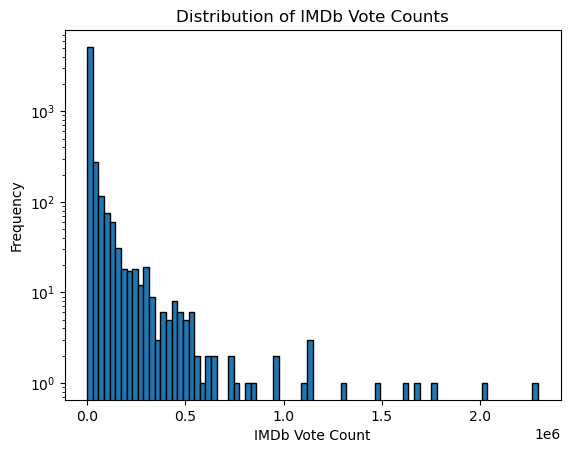

In [43]:
import matplotlib.pyplot as plt


plt.hist(titles_df['imdb_votes'], bins=80, edgecolor='k')
plt.xlabel('IMDb Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Vote Counts')
plt.yscale('log')
plt.show()

In [44]:
value_counts = titles_df['age_certification'].value_counts()
value_counts

age_certification
TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: count, dtype: int64

In [45]:
titles_df.isnull().sum().sort_values()

id                         0
documentation              0
drama                      0
crime                      0
action                     0
thriller                   0
european                   0
fantasy                    0
comedy                     0
war                        0
romance                    0
western                    0
history                    0
music                      0
family                     0
horror                     0
scifi                      0
animation                  0
reality                    0
sport                      0
first_continent            0
is_international           0
continent_list             0
imdb_score                 0
title                      0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
continent                  0
imdb_votes                 0
adjusted_imdb_score        0
North America              0
Europe        

In [46]:
missing_percentage = titles_df.isnull().mean() * 100
missing_percentage

id                       0.000000
title                    0.000000
type                     0.000000
description              0.290648
release_year             0.000000
age_certification       44.759788
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 63.993845
imdb_id                  6.890067
imdb_score               0.000000
imdb_votes               0.000000
tmdb_popularity          1.538725
tmdb_score               5.300051
North America            0.000000
Europe                   0.000000
Africa                   0.000000
Asia                     0.000000
South America            0.000000
Oceania                  0.000000
Unknown                  0.000000
continent                0.000000
continent_list           0.000000
is_international         0.000000
first_continent          0.000000
documentation            0.000000
drama                    0.000000
crime                    0.000000
action        

## Handling Missing `season`

Although 63% of the `season` column is null, when filtered by shows, there is no missing data for the `season` column. This indicates that the missing values are related to the movie type and not actually missing data. Therefore, these null values are expected and do not require imputation or correction.

In [47]:
tv_shows = titles_df[titles_df['type'] == 'SHOW']
missing_seasons_count = tv_shows['seasons'].isnull().sum()
tv_shows.isnull().sum()

id                        0
title                     0
type                      0
description               9
release_year              0
age_certification       255
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 141
imdb_score                0
imdb_votes                0
tmdb_popularity          29
tmdb_score              116
North America             0
Europe                    0
Africa                    0
Asia                      0
South America             0
Oceania                   0
Unknown                   0
continent                 0
continent_list            0
is_international          0
first_continent           0
documentation             0
drama                     0
crime                     0
action                    0
thriller                  0
european                  0
fantasy                   0
comedy                    0
war                       0
romance             

In [48]:
age_cert_missing = titles_df['age_certification'].isnull()
titles_df[age_cert_missing]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","[GB, US]",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,war,7.70
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"[action, drama, war]","[GB, US]",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action,7.50
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"[romance, comedy]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,7.50
14,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"[drama, crime, comedy]",[EG],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.50
17,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,[drama],[EG],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.60
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",[NG],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.65
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.68
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],[CO],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,3.74


The high number of missing age certifications for movies could be due to several reasons:

- **Older Movies**: Many older movies might not have age certifications listed because age rating systems were introduced later.

- **International Titles**: Netflix hosts a wide array of international titles. Different countries have different rating systems, and not all international titles might have corresponding age certifications.

- **Data Collection Gaps**: There might be gaps or inconsistencies in the data collection process, leading to missing entries for certain attributes, including age certifications.

In [49]:
movies = titles_df[titles_df['type'] == 'MOVIE']
movies.isnull().sum()

id                         0
title                      0
type                       0
description                8
release_year               0
age_certification       2363
runtime                    0
genres                     0
production_countries       0
seasons                 3743
imdb_id                  262
imdb_score                 0
imdb_votes                 0
tmdb_popularity           61
tmdb_score               194
North America              0
Europe                     0
Africa                     0
Asia                       0
South America              0
Oceania                    0
Unknown                    0
continent                  0
continent_list             0
is_international           0
first_continent            0
documentation              0
drama                      0
crime                      0
action                     0
thriller                   0
european                   0
fantasy                    0
comedy                     0
war           

## Categorizing IMDb Scores - (this is named as success category in Tableau workbook)

To categorize the IMDb scores based on both the adjusted IMDb scores and the number of votes, I defined a function.

The function categorizes titles into four categories based on their adjusted IMDb scores and the number of votes they received. The categories are assigned as follows:

- **Category 4**: Titles with high adjusted IMDb scores and high vote counts.
- **Category 3**: Titles with moderately high adjusted IMDb scores and varying vote counts. This includes titles that have achieved a fairly high score but have a range of vote counts, indicating that while they are well-received, the amount of feedback they have received varies.
- **Category 2**: Titles with moderate adjusted IMDb scores and varying vote counts. These titles have middle-tier scores and a range of vote counts, suggesting average reception with some variability in the number of users who rated them.
- **Category 1**: Titles with lower adjusted IMDb scores or very low vote counts. These are titles that either did not score well or have very few votes, reflecting lower engagement or popularity.

After defining the function, I applied it to the DataFrame to create a new column score_category that contains these categories.


In [50]:
def categorize_scores(row):
    if row['imdb_votes'] < 600:
        if row['adjusted_imdb_score'] >= 8.5:
            return 3
        elif row['adjusted_imdb_score'] >= 7:
            return 2
        elif row['adjusted_imdb_score'] >= 5:
            return 1
        else:
            return 1
    elif row['imdb_votes'] < 2500:
        if row['adjusted_imdb_score'] >= 8.5:
            return 3
        elif row['adjusted_imdb_score'] >= 7:
            return 2
        elif row['adjusted_imdb_score'] >= 5:
            return 1
        else:
            return 1
    elif row['imdb_votes'] < 10000:
        if row['adjusted_imdb_score'] >= 8.5:
            return 4
        elif row['adjusted_imdb_score'] >= 7:
            return 3
        elif row['adjusted_imdb_score'] >= 5:
            return 2
        else:
            return 1
    elif row['imdb_votes'] < 45000:
        if row['adjusted_imdb_score'] >= 8.5:
            return 4
        elif row['adjusted_imdb_score'] >= 7:
            return 3
        elif row['adjusted_imdb_score'] >= 5:
            return 2
        else:
            return 1
    else:
        if row['adjusted_imdb_score'] >= 8.5:
            return 4
        elif row['adjusted_imdb_score'] >= 7:
            return 3
        elif row['adjusted_imdb_score'] >= 5:
            return 2
        else:
            return 1

titles_df['score_category'] = titles_df.apply(categorize_scores, axis=1)
titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,documentation,6.60,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,8.20,3
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.70,3
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fantasy,8.20,3
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","[GB, US]",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,war,7.70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"[romance, drama]",[NG],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.65,1
5845,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.68,2
5846,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,[comedy],[CO],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,3.74,1
5847,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,6.60,1


## Credits Dataset

In [51]:
credits_df = pd.read_csv('data/credits 2 of 2.csv')

In [52]:
credits_df.shape

(77801, 5)

In [53]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [54]:
credits_df.head(5)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [55]:
credits_df.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


In [56]:
credits_df.isnull().sum().sort_values()

person_id       0
id              0
name            0
role            0
character    9772
dtype: int64

## Checking for Duplicates in `credits_df`

This code identifies the number of duplicated id values in the credits_df DataFrame. However, these duplicates are not genuine duplicates of titles. Instead, this occurs because each title can have multiple actors associated with it. Therefore, the same id (which represents a title) can appear multiple times, each time corresponding to a different actor or crew member related to that title.

The presence of these "duplicates" is expected and does not indicate any issue with the data quality. It reflects the fact that each title can have multiple associated entries in the credits DataFrame.

In [57]:
credits_df.duplicated('id').sum()

72312

In [58]:
credits_df.set_index('id', inplace=True)

In [59]:
credits_df.reset_index(inplace=True)

In [60]:
credits_df.sample(5)

,id,person_id,name,character,role
30628,ts56480,17243,Frances O'Connor,Hecuba,ACTOR
47141,tm678022,10042,Kevin Chamberlin,Sheldon Saperstein,ACTOR
25200,tm201365,67347,Ashutosh Rana,Paasha,ACTOR
35876,tm325102,59507,Candi Milo,Kid Pickles / Cleevil / Mama Bear (voice),ACTOR
64910,tm1044289,1345337,Ingrid Kleinig,Kira,ACTOR


## Scraping Data for Netflix Originals

To obtain data on Netflix Originals, I scraped Wikipedia. The data is stored in the `originals_df` DataFrame.
The scraping process involved extracting information from the Wikipedia page listing Netflix original programming. This provided a dataset of Netflix original titles.

The data was sourced from the following URL:
https://en.wikipedia.org/wiki/List_of_Netflix_original_programming


In [61]:
originals_df = pd.read_csv('data/Wiki_Netflix_Originals1.csv')

In [62]:
originals_df.shape

(361, 1)

In [63]:
originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   361 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [64]:
originals_df.isnull().sum().sort_values()

title    0
dtype: int64

In [65]:
originals_df.sample(5)

,title
271,Barbecue Showdown
182,Cindy la Regia: The High School Years
216,Aníkúlápó: Rise of the Spectre
25,Òlòtūré: The Journey
203,Another Self


## Merging Titles and Credits Data

To combine the titles and credits data, I performed a merge. This operation merges the `titles_df` and `credits_df` DataFrames based on their common `id` column. The merge is a left join, ensuring that all entries from the `titles_df` are retained. Since I performed a left join during the merge operation, all titles from the titles_df are included in the merged DataFrame (titles_credits_df), but not all titles have matching credit information in the credits_df. This results in null values for the person_id, name and role columns for those titles without credits.

In [66]:
titles_credits_df = pd.merge(left = titles_df, right = credits_df, how = 'left', on = 'id')
titles_credits_df.sample(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role
69481,ts271867,Vincenzo,SHOW,Vincenzo Cassano is an Italian lawyer and Mafi...,2021,NaN,81,"[action, drama, comedy, crime, romance]",[KR],1.0,...,0.0,0.0,0.0,action,8.40,3,72818.0,You Chea-myung,Hong Yu-chan,ACTOR
4048,tm12876,Bombay,MOVIE,A Hindu man and a Muslim woman fall in love in...,1995,NaN,141,"[drama, romance]",[IN],NaN,...,0.0,0.0,0.0,drama,8.10,3,63365.0,Sonali Bendre,"Special appearance in song ""Humma Humma""",ACTOR
29849,tm273294,I Don't Feel at Home in This World Anymore,MOVIE,"When a depressed woman is burglarized, she fin...",2017,NaN,93,"[drama, thriller, crime, comedy, european]",[US],NaN,...,0.0,0.0,0.0,drama,6.90,2,2845.0,Elijah Wood,Tony,ACTOR
75226,tm1101878,Honey Girls,MOVIE,"Mega pop star, Fancy G, hosts a contest to fin...",2021,PG,90,"[family, music, comedy]",[US],NaN,...,0.0,0.0,0.0,family,4.67,1,1546035.0,Zya Acala,Young Kelsey,ACTOR
75391,tm1000185,Squared Love,MOVIE,A celebrity journalist and renowned womanizer ...,2021,NaN,102,"[comedy, romance]",[PL],NaN,...,0.0,0.0,0.0,comedy,5.10,2,1255803.0,Marek Braun,Father of Kazik,ACTOR


In [67]:
titles_credits_df.sample(50)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role
42578,tm311193,Seeking a Man,MOVIE,Shams is an Egyptian bank employee who dreams...,2017,NaN,100,"[romance, comedy, drama]",[EG],NaN,...,0.0,0.0,0.0,romance,6.29,1,411918.0,Nelly Karim,Shams,ACTOR
48245,ts161737,Dare Me,SHOW,The lives of several cheerleaders are changed ...,2019,TV-MA,43,"[thriller, crime, drama, reality]",[US],1.0,...,0.0,1.0,0.0,thriller,6.60,2,164378.0,Josephine Decker,NaN,DIRECTOR
55976,tm941382,Stand by Me Doraemon 2,MOVIE,She and her beloved Shizuka are finally marrie...,2020,PG,96,"[scifi, animation, comedy, drama, family, fant...",[JP],NaN,...,1.0,0.0,0.0,scifi,7.50,3,46983.0,Nobuko Miyamoto,Nobita's Grandmother (voice),ACTOR
16102,tm151663,Nightcrawler,MOVIE,"When Lou Bloom, desperate for work, muscles in...",2014,R,118,"[thriller, crime, drama]",[US],NaN,...,0.0,0.0,0.0,thriller,7.80,3,77329.0,Kevin Rahm,Frank Kruse,ACTOR
36633,tm425884,They'll Love Me When I'm Dead,MOVIE,"As his life comes to its end, famous Hollywood...",2018,NaN,98,[documentation],[US],NaN,...,0.0,0.0,0.0,documentation,7.40,3,5566.0,Frank Marshall,Himself,ACTOR
23205,tm142881,Jem and the Holograms,MOVIE,As a small-town girl catapults from undergroun...,2015,PG,118,"[fantasy, music, romance, scifi, drama, family]",[US],NaN,...,0.0,0.0,0.0,fantasy,4.10,1,38104.0,Katie Findlay,Stormer,ACTOR
61176,tm854454,Varane Avashyamund,MOVIE,A divorced woman trying to get hired as a Fren...,2020,NaN,145,"[comedy, family, romance, drama]",[IN],NaN,...,0.0,0.0,0.0,comedy,6.90,2,141330.0,Lalu Alex,Manuel,ACTOR
61268,tm918962,Fearless,MOVIE,A teen gamer is forced to level up to full-tim...,2020,PG,89,"[animation, family, scifi, documentation, comedy]",[CA],NaN,...,1.0,0.0,0.0,animation,4.90,1,55184.0,Cory Edwards,NaN,DIRECTOR
54848,tm847629,Dolly Parton: Here I Am,MOVIE,"Dolly Parton leads a moving, musical journey i...",2019,NaN,89,"[documentation, music]",[GB],NaN,...,0.0,0.0,0.0,documentation,7.30,2,82159.0,Jerry Douglas,Self,ACTOR
4860,tm150112,Old School,MOVIE,Three friends attempt to recapture their glory...,2003,R,88,"[comedy, european]",[US],NaN,...,0.0,0.0,0.0,comedy,7.00,3,21720.0,Raymond Ma,Mr. Ma,ACTOR


In [68]:
titles_credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78161 entries, 0 to 78160
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78161 non-null  object 
 1   title                 78161 non-null  object 
 2   type                  78161 non-null  object 
 3   description           78114 non-null  object 
 4   release_year          78161 non-null  int64  
 5   age_certification     46899 non-null  object 
 6   runtime               78161 non-null  int64  
 7   genres                78161 non-null  object 
 8   production_countries  78161 non-null  object 
 9   seasons               14976 non-null  float64
 10  imdb_id               74628 non-null  object 
 11  imdb_score            78161 non-null  float64
 12  imdb_votes            78161 non-null  float64
 13  tmdb_popularity       78062 non-null  float64
 14  tmdb_score            76886 non-null  float64
 15  North America      

In [69]:
filtered = titles_credits_df['person_id'].isnull()
titles_credits_df[filtered]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,...,0.0,0.0,0.0,documentation,6.60,1,NaN,NaN,NaN,NaN
3543,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"[documentation, family, reality]",[JP],12.0,...,0.0,1.0,0.0,documentation,6.60,1,NaN,NaN,NaN,NaN
5326,tm997728,Blade Runner: The Final Cut,MOVIE,"Visually spectacular, intensely action-packed ...",2007,R,117,"[action, thriller, scifi]",[US],NaN,...,0.0,0.0,0.0,action,6.60,1,NaN,NaN,NaN,NaN
8103,ts33559,Shaun the Sheep,SHOW,Shaun the Sheep thinks and acts like a person ...,2007,TV-G,7,"[animation, comedy, family, european]",[GB],6.0,...,1.0,0.0,0.0,animation,7.82,2,NaN,NaN,NaN,NaN
8856,ts98340,Metallica: Some Kind of Monster,SHOW,This collection includes the acclaimed rock do...,2004,TV-MA,84,[western],"[CA, US]",1.0,...,0.0,0.0,0.0,western,6.60,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78117,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"[animation, family]",[],NaN,...,1.0,0.0,0.0,animation,5.46,1,NaN,NaN,NaN,NaN
78134,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],[US],NaN,...,0.0,0.0,0.0,None,6.60,1,NaN,NaN,NaN,NaN
78147,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,[drama],[],NaN,...,0.0,0.0,0.0,drama,7.68,2,NaN,NaN,NaN,NaN
78159,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],[US],NaN,...,0.0,0.0,0.0,None,6.60,1,NaN,NaN,NaN,NaN


## Identifying Netflix Originals

To identify which titles in the dataset are Netflix Originals, I performed the following steps:

1. **Creating a Column for Netflix Originals**:
   I added a new column `is_netflix_original` to the `originals_df` DataFrame, setting it to `True` for all rows to indicate that these titles are Netflix Originals.

2. **Merging Titles and Credits with Originals Data**:
I then merged the titles_credits_df DataFrame with the originals_df DataFrame on the title column. This merge operation included the is_netflix_original column from originals_df into the merged DataFrame, titles_credits_originals_df.

3. **Handling Missing Values**:
After the merge, any titles that were not identified as Netflix Originals in the originals_df had null values in the is_netflix_original column. These null values were then filled with False to indicate that these titles are not Netflix Originals.

In [70]:
originals_df['is_netflix_original'] = True

titles_credits_originals_df = pd.merge(
    left=titles_credits_df, 
    right=originals_df[['title', 'is_netflix_original']], 
    how='left', 
    on='title'
)

titles_credits_originals_df['is_netflix_original'] = titles_credits_originals_df['is_netflix_original'].fillna(False)

titles_credits_originals_df.sample(50)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role,is_netflix_original
75160,tm1025493,Dasvi,MOVIE,"Jailed under a tough cop, an uneducated politi...",2022,NaN,125,"[comedy, drama]",[IN],NaN,...,0.0,0.0,comedy,7.40,3,169035.0,Manu Rishi Chadha,Satpal Tomar,ACTOR,False
35531,tm357820,The Open House,MOVIE,A teenager and his mother find themselves besi...,2018,NaN,94,"[thriller, horror]",[US],NaN,...,0.0,0.0,thriller,3.30,1,786140.0,Suzanne Coote,Waitress,ACTOR,False
54543,tm467467,Homecoming: A Film by Beyoncé,MOVIE,"This intimate, in-depth look at Beyoncé's cele...",2019,PG-13,137,"[documentation, music]",[US],NaN,...,0.0,0.0,documentation,7.50,3,896998.0,SZA,Self,ACTOR,False
16152,ts16045,Are You The One?,SHOW,In the most ambitious dating experiment ever a...,2014,TV-14,41,[reality],[US],8.0,...,1.0,0.0,reality,6.40,2,798881.0,Ethan Cohen,Ethan Cohen,ACTOR,False
21777,tm219233,Loving,MOVIE,"The story of Richard and Mildred Loving, an in...",2016,PG-13,123,"[drama, romance]","[GB, US]",NaN,...,0.0,0.0,drama,7.00,3,1113935.0,Jason Alan Cook,Soundman,ACTOR,False
23532,tm245378,Barry,MOVIE,A biopic of Barack Obama set during his time a...,2016,NaN,104,[drama],[US],NaN,...,0.0,0.0,drama,5.90,2,401011.0,Nashawn Kearse,Black Israelite Speaker,ACTOR,False
63992,tm1005937,Sanitation Day,MOVIE,Two cops must contend with the uncooperative t...,2020,NaN,104,"[thriller, crime]",[NG],NaN,...,0.0,0.0,thriller,3.13,1,1888428.0,Elvina Ibru,NaN,ACTOR,False
35091,tm294581,The Clapper,MOVIE,15 minutes of fame destroys the life of a man ...,2018,R,89,"[comedy, drama]",[US],NaN,...,0.0,0.0,comedy,5.10,2,652372.0,Brian Gilbert,New Attendant,ACTOR,False
5207,ts20305,Naruto,SHOW,"In another world, ninja are the ultimate power...",2002,TV-PG,23,"[animation, action, scifi, comedy, fantasy, th...",[JP],6.0,...,0.0,0.0,animation,8.40,3,57417.0,Chie Nakamura,Sakura Haruno (voice),ACTOR,False
70551,ts250092,Shaman King,SHOW,Shaman King follows the adventures of a 13-yea...,2021,TV-PG,25,"[comedy, fantasy, animation, action, scifi]",[JP],1.0,...,0.0,0.0,comedy,6.90,1,1535616.0,Takumu Miyazono,Ponchi (voice),ACTOR,False


In [71]:
titles_credits_originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78161 entries, 0 to 78160
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78161 non-null  object 
 1   title                 78161 non-null  object 
 2   type                  78161 non-null  object 
 3   description           78114 non-null  object 
 4   release_year          78161 non-null  int64  
 5   age_certification     46899 non-null  object 
 6   runtime               78161 non-null  int64  
 7   genres                78161 non-null  object 
 8   production_countries  78161 non-null  object 
 9   seasons               14976 non-null  float64
 10  imdb_id               74628 non-null  object 
 11  imdb_score            78161 non-null  float64
 12  imdb_votes            78161 non-null  float64
 13  tmdb_popularity       78062 non-null  float64
 14  tmdb_score            76886 non-null  float64
 15  North America      

## Filtering Netflix Originals

To filter the DataFrame and identify only the Netflix Originals, I used the following steps:

1. **Create a Boolean Mask**:
   Created a boolean mask to identify rows where the `is_netflix_original` column is `True`.

2. **Filter the DataFrame**:
Applied the boolean mask to the titles_credits_originals_df DataFrame to retrieve only the rows corresponding to Netflix Originals.

In [72]:
netflix_originals = titles_credits_originals_df['is_netflix_original'] == True
titles_credits_originals_df[netflix_originals]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role,is_netflix_original
2077,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,...,0.0,0.0,animation,8.8,4,22308.0,Mayumi Tanaka,Monkey D. Luffy (voice),ACTOR,True
2078,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,...,0.0,0.0,animation,8.8,4,36373.0,Kazuya Nakai,Roronoa Zoro (voice),ACTOR,True
2079,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,...,0.0,0.0,animation,8.8,4,58214.0,Akemi Okamura,Nami (voice),ACTOR,True
2080,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,...,0.0,0.0,animation,8.8,4,58215.0,Kappei Yamaguchi,Usopp (voice),ACTOR,True
2081,ts20339,One Piece,SHOW,"Years ago, the fearsome Pirate King, Gol D. Ro...",1999,TV-14,23,"[animation, action, comedy, drama, fantasy]",[JP],21.0,...,0.0,0.0,animation,8.8,4,60138.0,Hiroaki Hirata,Vinsmoke Sanji (voice),ACTOR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76849,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,...,0.0,0.0,comedy,7.5,2,1241389.0,Mahmoud El-Lisy,NaN,ACTOR,True
76850,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,...,0.0,0.0,comedy,7.5,2,609005.0,Nada Moussa,NaN,ACTOR,True
76851,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,...,0.0,0.0,comedy,7.5,2,176053.0,Khaled El Nabawy,NaN,ACTOR,True
76852,ts241296,Finding Ola,SHOW,"After a life-altering event, Ola Abd ElSabour ...",2022,TV-14,53,"[comedy, drama]",[],1.0,...,0.0,0.0,comedy,7.5,2,1991666.0,Dalia Shawky,NaN,ACTOR,True


In [73]:
titles_credits_originals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78161 entries, 0 to 78160
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78161 non-null  object 
 1   title                 78161 non-null  object 
 2   type                  78161 non-null  object 
 3   description           78114 non-null  object 
 4   release_year          78161 non-null  int64  
 5   age_certification     46899 non-null  object 
 6   runtime               78161 non-null  int64  
 7   genres                78161 non-null  object 
 8   production_countries  78161 non-null  object 
 9   seasons               14976 non-null  float64
 10  imdb_id               74628 non-null  object 
 11  imdb_score            78161 non-null  float64
 12  imdb_votes            78161 non-null  float64
 13  tmdb_popularity       78062 non-null  float64
 14  tmdb_score            76886 non-null  float64
 15  North America      

# Handling Duplicate Entries and Summing IMDb Votes

To handle duplicate entries and calculate the sum of IMDb votes for the first entry of each title, I performed the following steps:

1. **Mark First Entry for Each Title**:
Created a new column `First_Entry_Flag` to mark the first occurrence of each title based on the `id` column. This flag is set to `True` for the first entry and `False` for subsequent entries. The ~ operator is used to invert the boolean values, setting True for the first occurrence and False for duplicates.

2. **Calculate Sum of IMDb Votes for First Entry**:
Created a new column Sum_IMDb_Votes_First_Entry to store the IMDb votes only for the first entry of each title. This is done by multiplying the imdb_votes column with the First_Entry_Flag column, ensuring that only the votes for the first occurrence are considered. This helps in calculating the total IMDb votes accurately without counting duplicate entries multiple times.


In [74]:
titles_credits_originals_df['First_Entry_Flag'] = ~titles_credits_originals_df['id'].duplicated(keep='first')

In [75]:
titles_credits_originals_df['Sum_IMDb_Votes_First_Entry'] = titles_credits_originals_df['imdb_votes'] * titles_credits_originals_df['First_Entry_Flag']

In [76]:
pd.set_option('display.max_columns', None)
titles_credits_originals_df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,North America,Europe,Africa,Asia,South America,Oceania,Unknown,continent,continent_list,is_international,first_continent,documentation,drama,crime,action,thriller,european,fantasy,comedy,war,romance,western,history,music,family,horror,scifi,animation,reality,sport,first_genre,adjusted_imdb_score,score_category,person_id,name,character,role,is_netflix_original,First_Entry_Flag,Sum_IMDb_Votes_First_Entry
71575,ts317422,Saturday Morning All Star Hits!,SHOW,Follows Skip and Treybor as they celebrate all...,2021,TV-14,23,"[animation, comedy]",[US],1.0,tt15977708,7.5,948.0,2.598,6.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,animation,7.49,2,1951.0,Maurice LaMarche,(voice),ACTOR,False,False,0.0
22478,tm238722,Collateral Beauty,MOVIE,"Retreating from life after a tragedy, a man qu...",2016,PG-13,97,"[romance, drama]",[US],NaN,tt4682786,6.7,99712.0,25.409,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.70,2,7102.0,Ann Dowd,Sally Price,ACTOR,False,False,0.0
20861,ts18010,Bloodline,SHOW,A dramatic thriller that explores the demons l...,2015,TV-MA,57,"[drama, thriller]",[US],3.0,tt3520702,7.9,51422.0,17.338,7.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.90,3,14934.0,Chloë Sevigny,Chelsea O'Bannon,ACTOR,False,False,0.0
57596,ts235979,The Victims' Game,SHOW,After discovering his estranged daughter's lin...,2020,TV-MA,59,"[drama, crime, thriller]",[TW],1.0,tt12079212,7.3,1408.0,3.275,7.500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,drama,7.29,2,1708180.0,Honduras,Sun Yong Zhen,ACTOR,True,False,0.0
11959,tm62369,Connected,MOVIE,A debt collector receives a call from a woman ...,2008,NaN,110,"[thriller, action, crime]","[CN, HK]",NaN,tt1156506,6.6,2291.0,4.903,6.300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"Asia, Asia","[Asia, Asia]",True,international,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,thriller,6.60,1,36967.0,Louis Koo,Bob,ACTOR,False,True,2291.0
41470,tm351201,In the Family,MOVIE,"The neurotic Fikret and tavern singer Solmaz, ...",2017,PG-13,124,[comedy],[TR],NaN,tt7642818,7.7,23542.0,6.241,6.784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asia,[Asia],False,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comedy,7.70,3,488393.0,Erdal Özyağcılar,Haşmet Kurt,ACTOR,False,False,0.0
47958,tm332071,Velvet Buzzsaw,MOVIE,Big money artists and mega-collectors pay a hi...,2019,R,113,"[thriller, horror, comedy]",[US],NaN,tt7043012,5.7,60629.0,16.079,5.300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,thriller,5.70,2,1036616.0,Charles Coplin,Ricky (uncredited),ACTOR,False,False,0.0
28994,tm412550,Set It Up,MOVIE,Two overworked and underpaid assistants come u...,2018,R,105,"[romance, comedy]",[US],NaN,tt5304992,6.5,51861.0,18.364,6.900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,North America,[North America],False,North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance,6.50,2,174180.0,Claire Scanlon,NaN,DIRECTOR,False,False,0.0
11469,tm237621,The Figurine (Araromire),MOVIE,"Two buddies and a girl, down on their luck, ha...",2009,PG-13,122,"[horror, thriller, drama]",[NG],NaN,tt1542960,4.4,251.0,1.525,4.200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Africa,[Africa],False,Africa,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,horror,4.38,1,372928.0,Tosin Sido,Lara,ACTOR,False,False

In [77]:
titles_credits_originals_df.to_csv(r'C:\Users\pinar\Desktop\General Assembly Coursework to Study\Python\GitHub\Capstone Project\Netflix-Analysis\data\all_merged.csv', index = False)

In [78]:
titles_df.to_csv(r'C:\Users\pinar\Desktop\General Assembly Coursework to Study\Python\GitHub\Capstone Project\Netflix-Analysis\data\titles_with_continents.csv', index = False)

**Wordcloud on Descriptions**:

- Installed necessary libraries.
- Imported required libraries for wordcloud.
- Cleaned and tokenized text data in the descriptions.
- Generated and customized a word cloud for visualizing common words in descriptions.

In [79]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [6, 4]
import ast
import seaborn as sns
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
import contractions
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
import spacy
import string
punctuation_string = string.punctuation
punctuation_string += ''
punctuation = str.maketrans('', '', punctuation_string)
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
#nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pinar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


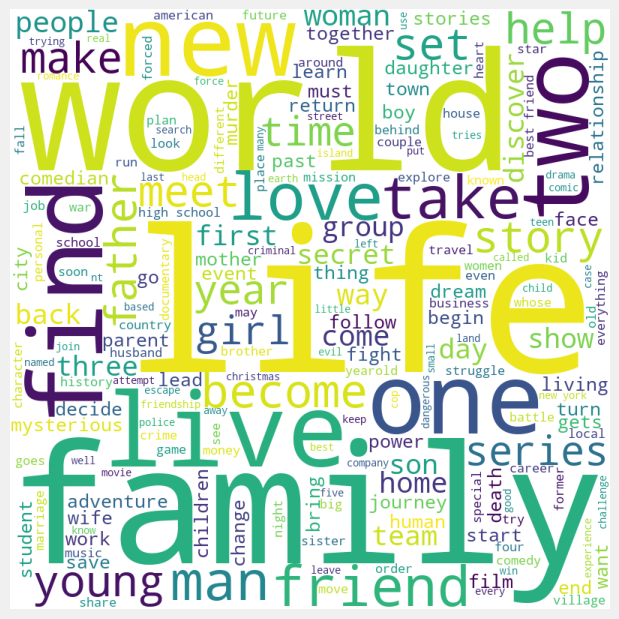

In [80]:
description = (titles_df
 .assign(processed_text=lambda titles_df: titles_df.description
         .astype(str)
         .str.lower()
         .apply(word_tokenize)
         .apply(lambda tokens: ' '.join([w for w in tokens if not w in stop_words]))
         .apply(lambda x: contractions.fix(x))
         .apply(lambda x: re.sub('[0-9]+','', x)) #remove numbers
         .apply(lambda x: re.sub('@ [A-z]+','',x)) #remove twitter handles
         .apply(lambda x: x.translate(punctuation))
         .apply(lambda x: re.sub(r'((http|ftp|https)://)?([\w.-]*)\.([\w]*)+',' ', x)) #remove URLs
         .apply(lambda x: re.sub(r'(http|ftp|https)://t\.co/[a-zA-Z0-9\-\.]{10}', ' ', x)) #remove t.co URLs
         .apply(lambda x: re.compile(pattern = "[" 
                                                u"\U0001F600-\U0001F64F"
                                                u"\U0001F300-\U0001F5FF"
                                                u"\U0001F680-\U0001F6FF"
                                                u"\U0001F1E0-\U0001F1FF"
                                                "]+", flags = re.UNICODE)
                                                .sub(r'', x))
         .apply(lambda x: re.sub(u"\uf8ff", '', x))
         .apply(lambda x: ' '.join(x.split()))
        # .apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))
         .apply(lambda x: re.sub('\s\S(?!\S)|(?<!\S)\S\s', '', x))
         .apply(lambda x: re.sub(r'\b\w{16,}\b', '', x))
        ))

words =''
for val in description.processed_text:
    val = str(val)
    tokens = val.split()

    words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800, background_color='white'
                      , min_font_size=10).generate(words)

plt.figure(figsize=(6, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

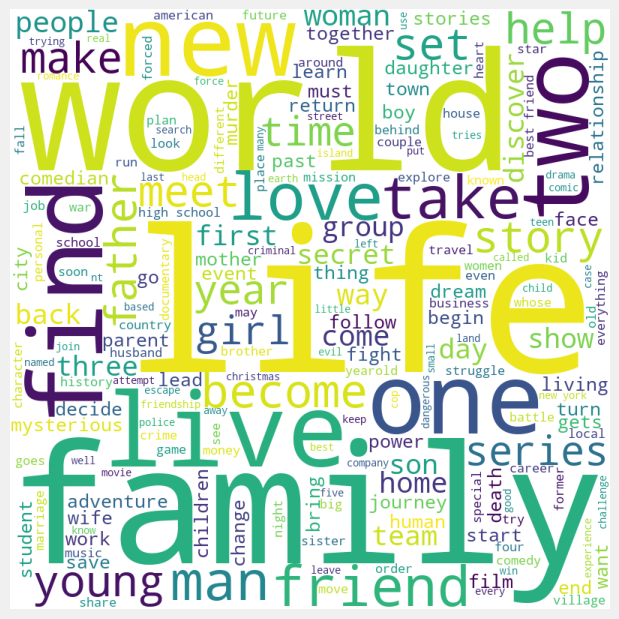

In [81]:
plt.figure(figsize=(6, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('plot.png', format='png')
plt.show()

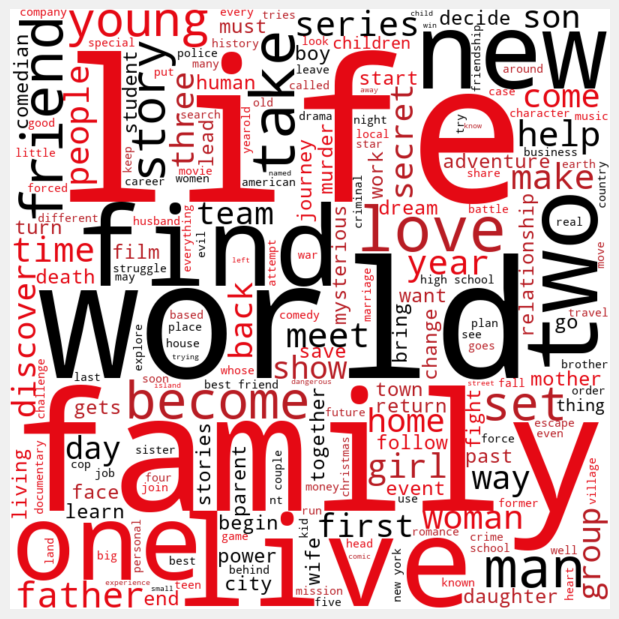

In [82]:
from random import choice

def netflix_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#E50914', '#B81D24', '#000000']
    return choice(colors)

wordcloud = WordCloud(width=800, height=800, background_color='white', color_func=netflix_color_func
                      , min_font_size=10).generate(words)

plt.figure(figsize=(6, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

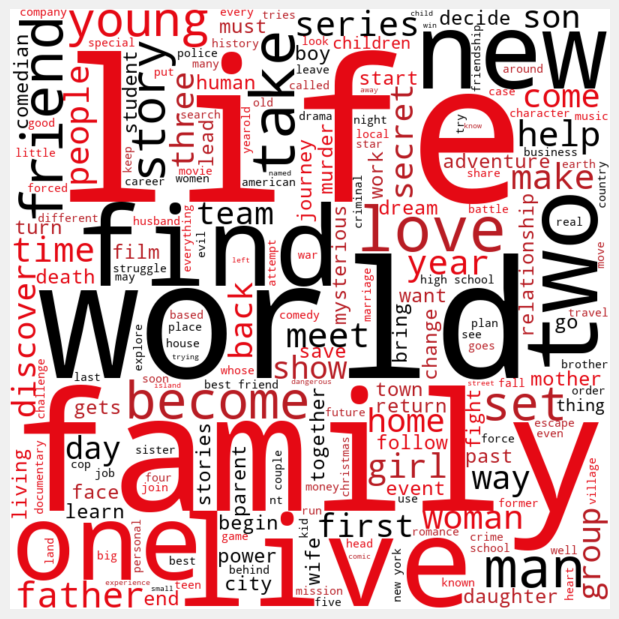

In [83]:
plt.figure(figsize=(6, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('plot.png', format='png')
plt.show()

## CORRELATIONS

pip install seaborn --upgrade

In [84]:
summary = titles_df.groupby(['first_continent','first_genre', 'release_year'])[['imdb_votes', 'imdb_score']].agg(['sum','count','mean']).reset_index()
(summary.loc[summary['first_continent']== 'Europe'].loc[summary['first_genre'] =='drama' ]
 .sort_values(by='release_year')
.iloc[1:,])[[('imdb_votes', 'sum'), ('imdb_votes', 'count'), ('imdb_score', 'mean')]].corr()
import numpy as np

In [85]:
unique_pair = []
# Get unique pairs of 'first_continent' and 'first_genre'
grouped = titles_df.groupby(['first_continent', 'first_genre', 'release_year'])['title'].count().reset_index()
pairs = grouped[['first_continent', 'first_genre']].values

for i in pairs:
    # Convert numpy array i to a tuple
    pair = tuple(i)
    if pair not in unique_pair:
        unique_pair.append(pair)

# Display unique pairs
pd.DataFrame(unique_pair, columns = ['continent', 'genre'])

,continent,genre
0,Africa,action
1,Africa,animation
2,Africa,comedy
3,Africa,crime
4,Africa,documentation
...,...,...
120,international,romance
121,international,scifi
122,international,thriller
123,international,war


In [86]:
corr_count_sum = []
corr_count_score = []

for pair in unique_pair:
    continent = pair[0]
    genre = pair[1]
    corr_count_sum.append((summary.loc[summary['first_continent']== continent].loc[summary['first_genre'] ==genre ]
     .sort_values(by='release_year')
        .iloc[1:,])[[('imdb_votes', 'sum'), ('imdb_votes', 'count'), ('imdb_score', 'mean')]].corr().iloc[2,0])
    corr_count_score.append((summary.loc[summary['first_continent']== continent].loc[summary['first_genre'] ==genre ]
         .sort_values(by='release_year')
        .iloc[1:,])[[('imdb_votes', 'sum'), ('imdb_votes', 'count'), ('imdb_score', 'mean')]].corr().iloc[2,1])

corrs_grouped =(pd.DataFrame(unique_pair, columns = ['continent', 'genre'])
 .assign(count_sum = corr_count_sum)
 .assign(count_score = corr_count_score))

corrs_grouped.loc[corrs_grouped['continent'] == 'Europe', :]

,continent,genre,count_sum,count_score
31,Europe,action,0.252920,-0.299755
32,Europe,animation,0.115379,0.139746
33,Europe,comedy,0.106411,-0.635944
34,Europe,crime,0.693391,-0.304559
35,Europe,documentation,-0.173435,-0.450113
36,Europe,drama,-0.055585,-0.740624
37,Europe,family,0.784470,-0.216825
38,Europe,fantasy,0.924333,0.165258
39,Europe,history,0.603826,0.423659
40,Europe,horror,-0.860930,-0.198419


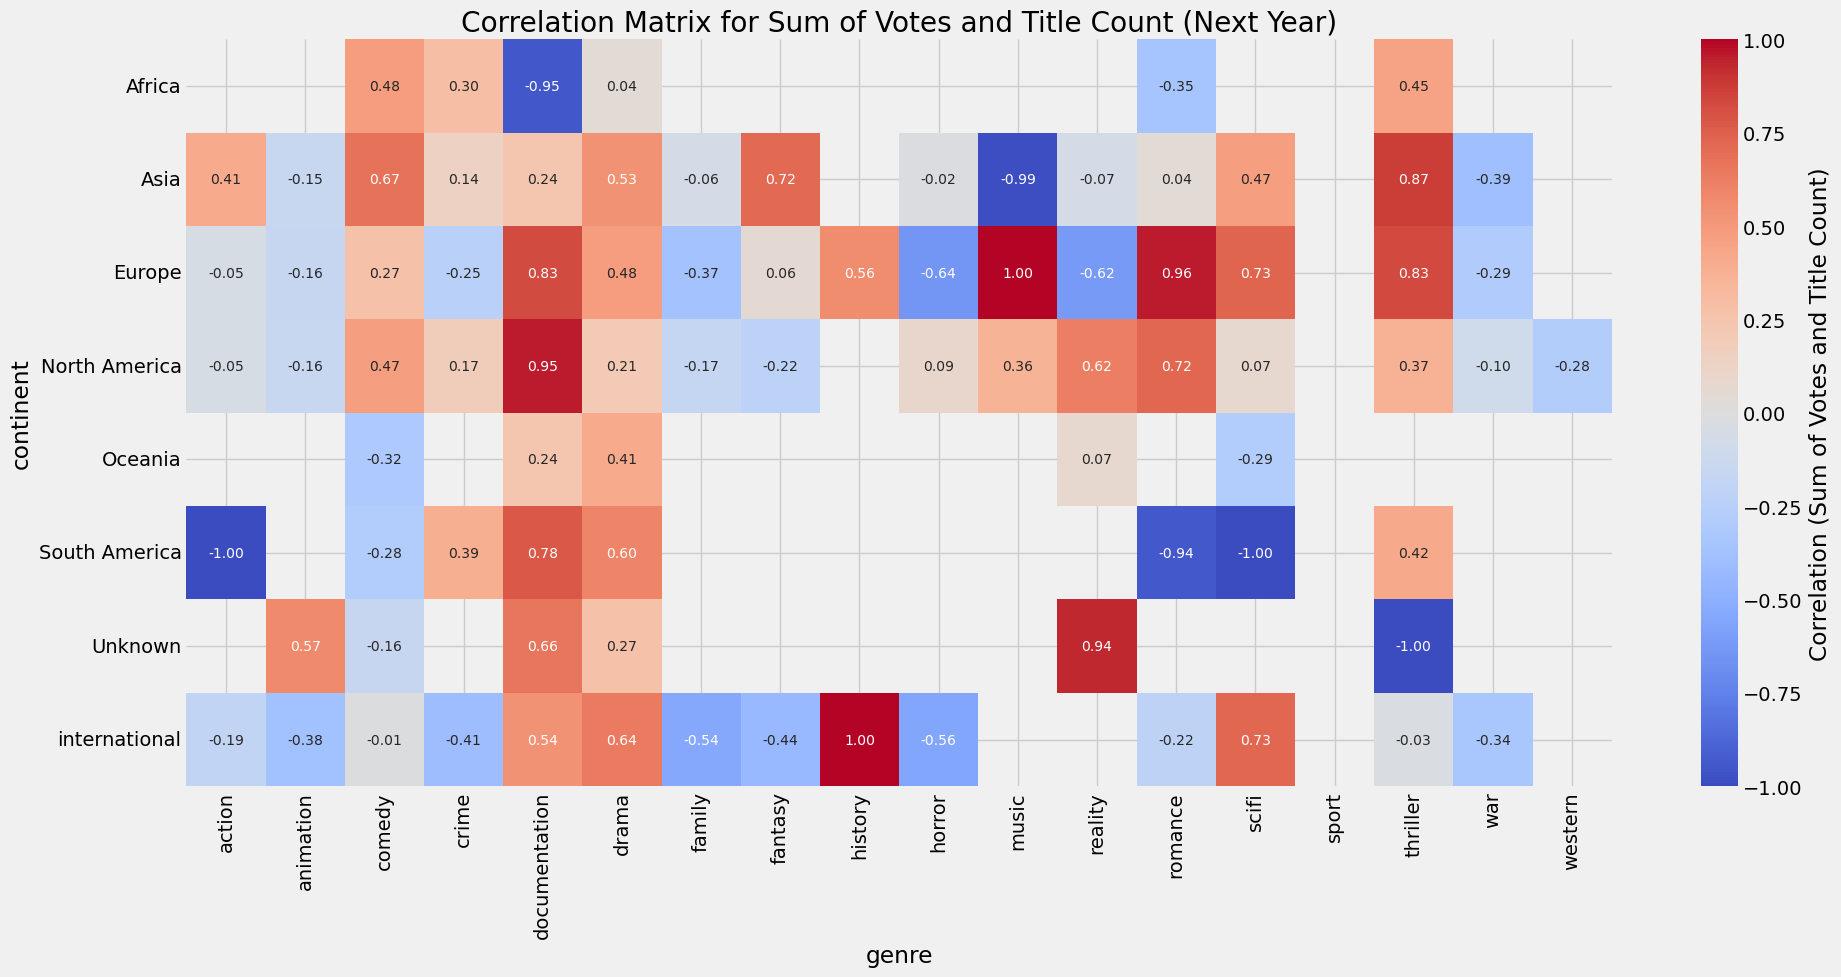

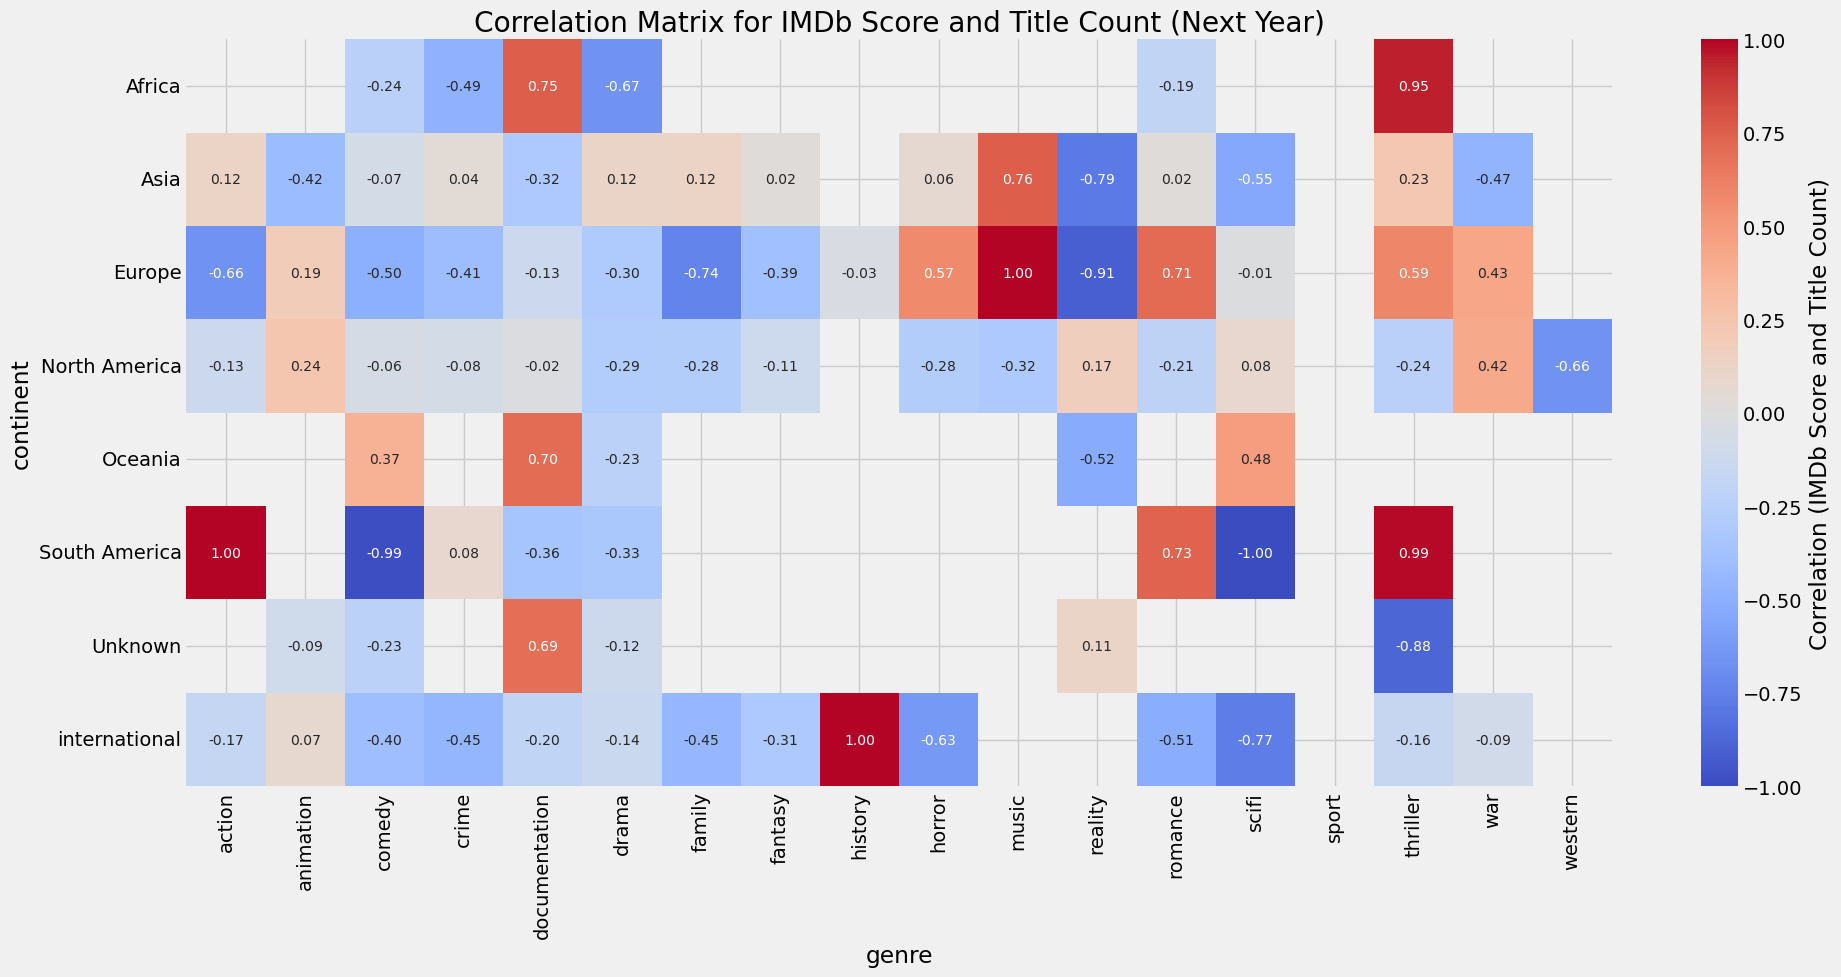

In [87]:
titles_df = titles_df[titles_df['release_year'] < 2021]

# Step 1: Aggregate Data by Year and Genre
summary = titles_df.groupby(['first_continent', 'first_genre', 'release_year']).agg({
    'imdb_votes': 'sum',
    'adjusted_imdb_score': 'mean',
    'title': 'count'
}).reset_index().rename(columns={'title': 'title_count', 'adjusted_imdb_score': 'avg_adjusted_imdb_score'})

# Step 2: Shift the Count Data
summary['title_count_shifted'] = summary.groupby(['first_continent', 'first_genre'])['title_count'].shift(-1)

# Step 3: Calculate Correlation for Each Continent and Genre
unique_pair = summary[['first_continent', 'first_genre']].drop_duplicates().values.tolist()

corr_sum_title_count = []
corr_score_title_count = []

for pair in unique_pair:
    continent, genre = pair
    filtered_data = summary[(summary['first_continent'] == continent) & (summary['first_genre'] == genre)]
    filtered_data = filtered_data.dropna()

    # Calculate correlation between sum of votes and shifted title count
    corr_sum = filtered_data[['imdb_votes', 'title_count_shifted']].corr().iloc[0, 1]
    corr_sum_title_count.append(corr_sum)

    # Calculate correlation between average adjusted IMDb score and shifted title count
    corr_score = filtered_data[['avg_adjusted_imdb_score', 'title_count_shifted']].corr().iloc[0, 1]
    corr_score_title_count.append(corr_score)

# Step 4: Create a DataFrame with the calculated correlations
corrs_grouped = pd.DataFrame(unique_pair, columns=['continent', 'genre'])
corrs_grouped['corr_sum_title_count'] = corr_sum_title_count
corrs_grouped['corr_score_title_count'] = corr_score_title_count

# Pivot the DataFrame for heatmap
pivot_table_sum = corrs_grouped.pivot(index='continent', columns='genre', values='corr_sum_title_count')
pivot_table_score = corrs_grouped.pivot(index='continent', columns='genre', values='corr_score_title_count')

# Step 5: Create the heatmap for sum of votes and title count
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table_sum, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10}, cbar_kws={'label': 'Correlation (Sum of Votes and Title Count)'})
plt.title('Correlation Matrix for Sum of Votes and Title Count (Next Year)')
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

# Create the heatmap for adjusted IMDb score and title count
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table_score, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10}, cbar_kws={'label': 'Correlation (IMDb Score and Title Count)'})
plt.title('Correlation Matrix for IMDb Score and Title Count (Next Year)')
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

In [88]:
import seaborn as sns

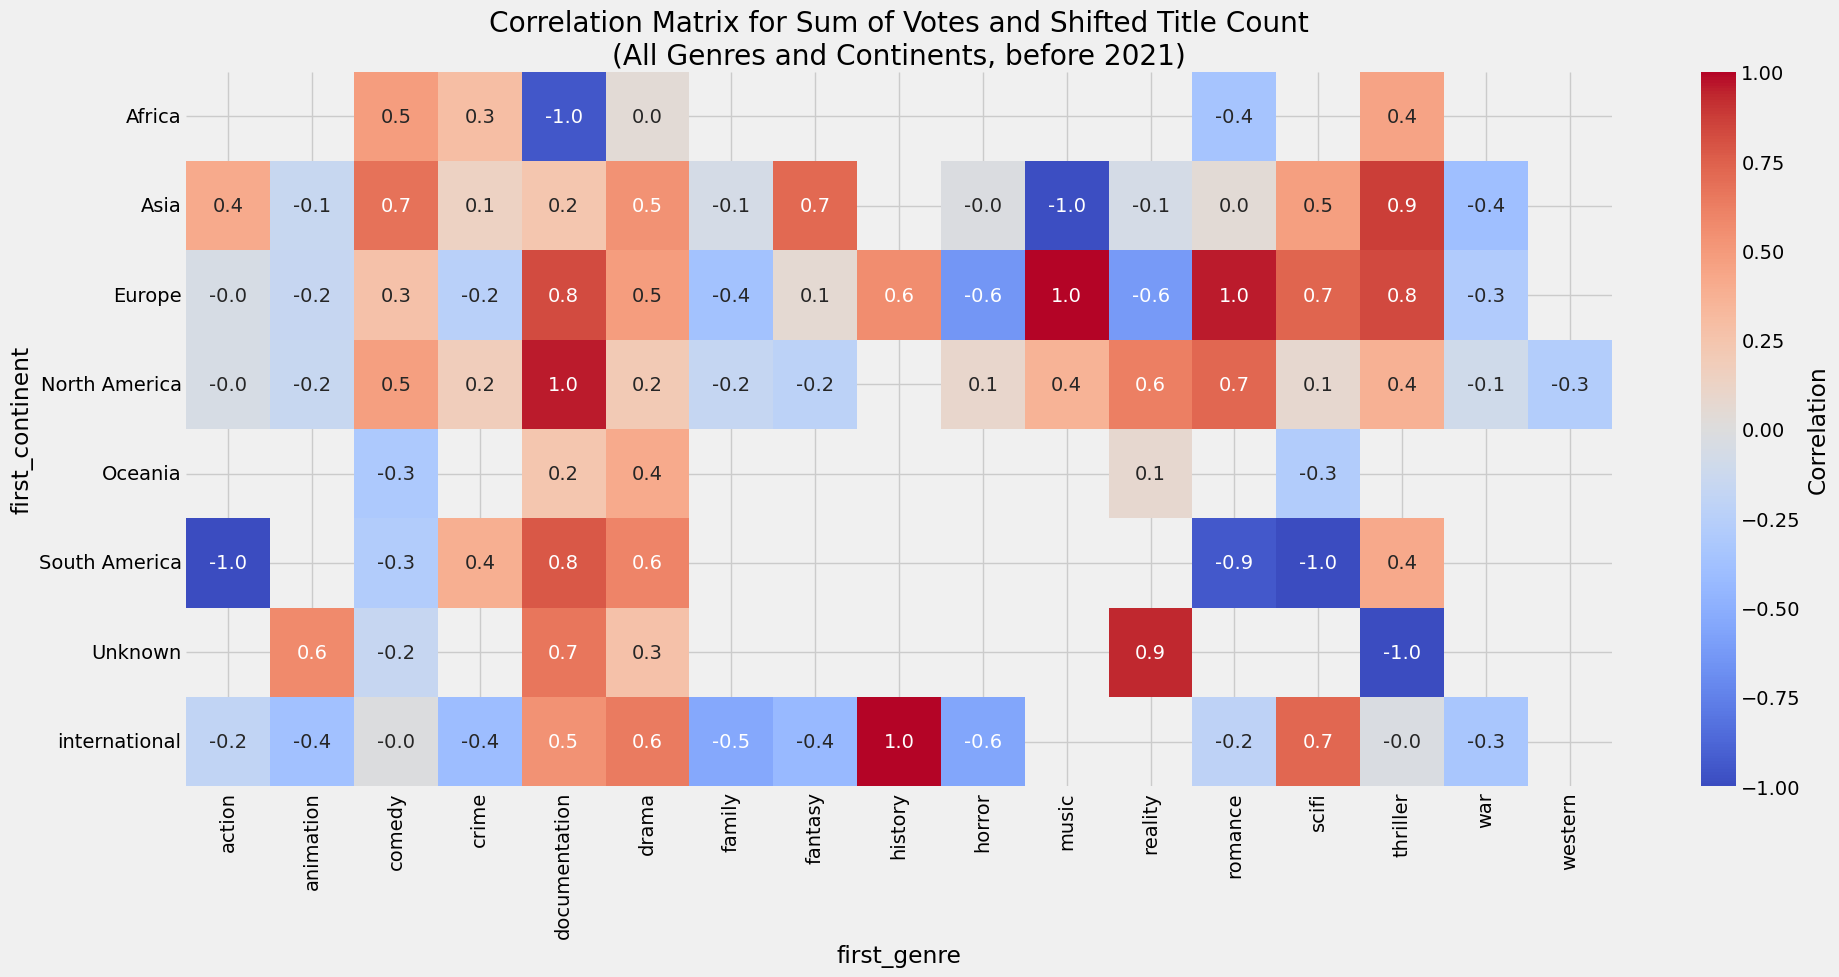

In [89]:
titles_df = titles_df[(titles_df['release_year'] < 2021)]

# Step 1: Aggregate Data by Year and Genre
summary = titles_df.groupby(['first_continent', 'first_genre', 'release_year']).agg({
    'imdb_votes': 'sum',
    'title': 'count'
}).reset_index().rename(columns={'title': 'title_count'})

# Step 2: Shift the Count Data
summary['title_count_shifted'] = summary.groupby(['first_continent', 'first_genre'])['title_count'].shift(-1)

# Step 3: Calculate Correlation for Each Continent and Genre
correlations = summary.dropna().groupby(['first_continent', 'first_genre']).apply(
    lambda x: x[['imdb_votes', 'title_count_shifted']].corr().iloc[0, 1]
).reset_index().rename(columns={0: 'correlation'})

# Display the results for all continents
correlations_all = correlations
pd.set_option('display.max_rows', None)

# Pivot the DataFrame for heatmap
pivot_table = correlations_all.pivot(index='first_continent', columns='first_genre', values='correlation')

# Step 4: Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".1f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix for Sum of Votes and Shifted Title Count\n(All Genres and Continents, before 2021)')
plt.tight_layout()
plt.show()

In [90]:
titles_df = titles_df[(titles_df['release_year'] < 2021)]
summary = titles_df.groupby(['first_continent', 'first_genre', 'release_year']).agg({
    'imdb_votes': 'sum',
    'title': 'count'
}).reset_index().rename(columns={'title': 'title_count'})

# Step 2: Shift the Count Data
summary['title_count_shifted'] = summary.groupby(['first_continent', 'first_genre'])['title_count'].shift(-1)

# Step 3: Calculate Correlation for Each Continent and Genre
correlations = summary.dropna().groupby(['first_continent', 'first_genre']).apply(
    lambda x: x[['imdb_votes', 'title_count_shifted']].corr().iloc[0, 1]
).reset_index().rename(columns={0: 'correlation'})

# Display the results for all continents
correlations_all = correlations
pd.set_option('display.max_rows', None)

correlations_all

,first_continent,first_genre,correlation
0,Africa,action,NaN
1,Africa,comedy,0.477612
2,Africa,crime,0.296819
3,Africa,documentation,-0.950392
4,Africa,drama,0.044190
5,Africa,horror,NaN
6,Africa,romance,-0.351872
7,Africa,thriller,0.449344
8,Asia,action,0.411602
9,Asia,animation,-0.149421


## Analysis of Correlation between Moving Average of Votes and Shifted Title Count
This analysis aims to understand the relationship between the moving average of IMDb votes and the count of titles in the following year, segmented by continent and genre.

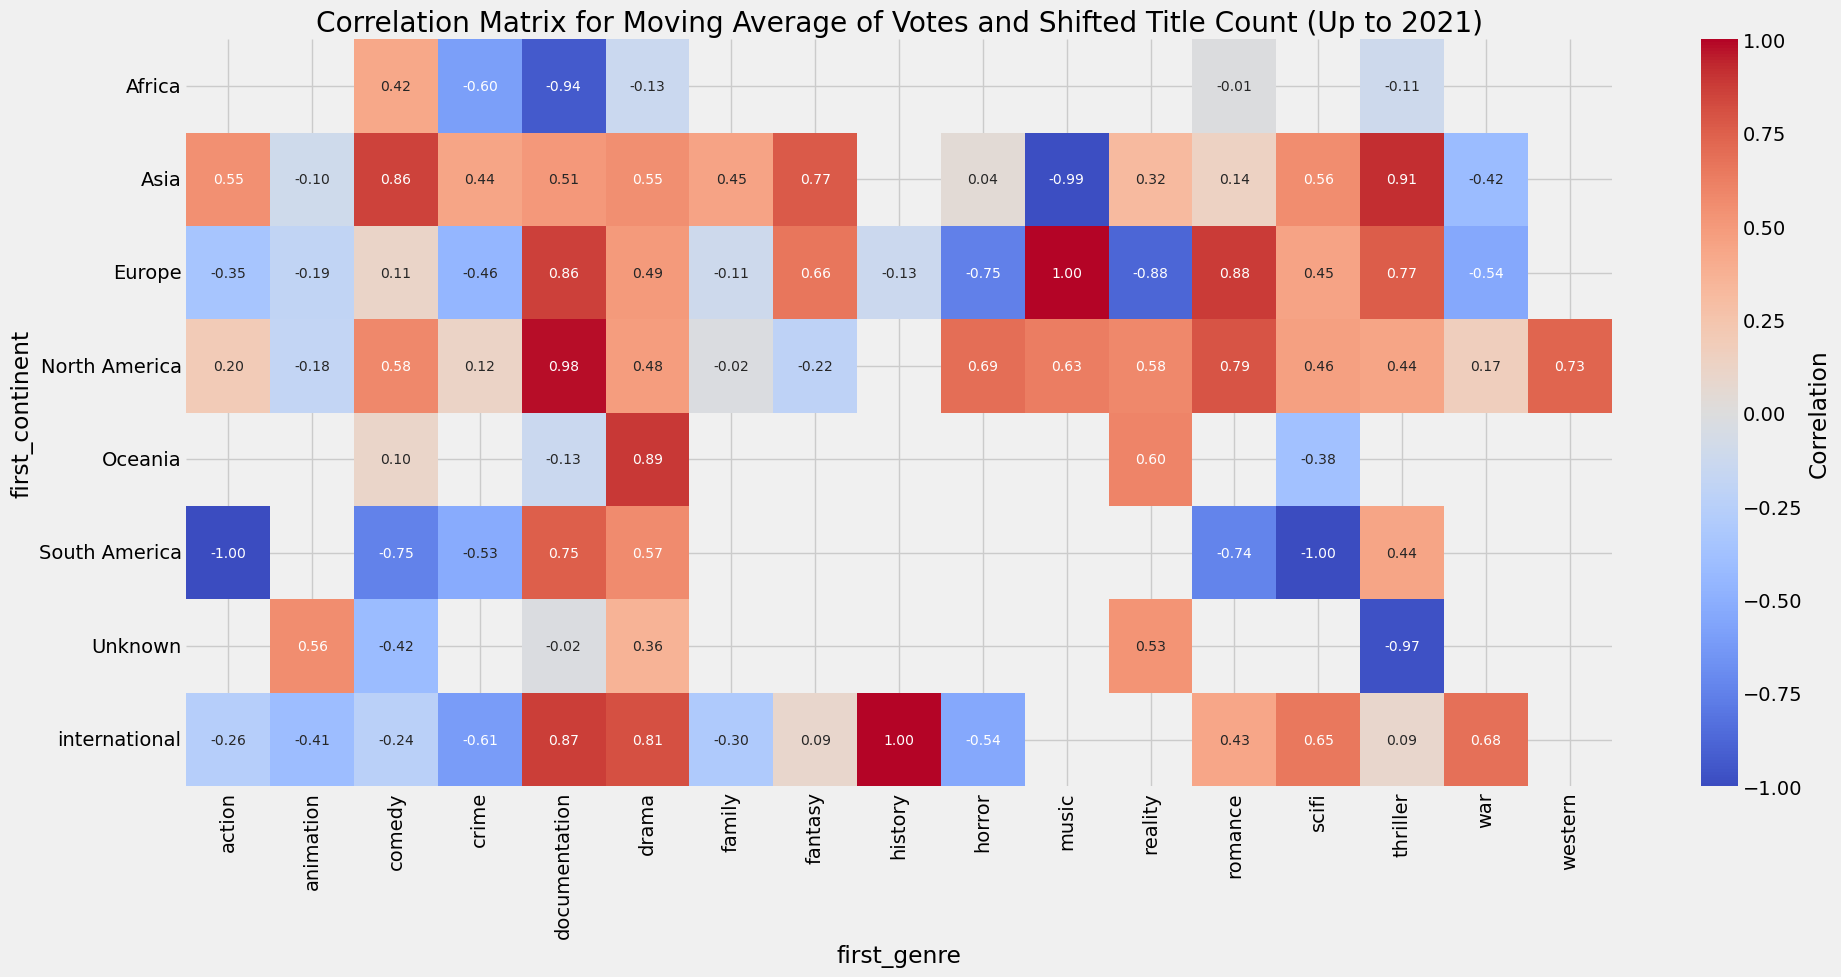

In [91]:
titles_df = titles_df[titles_df['release_year'] < 2021]
summary = titles_df.groupby(['first_continent', 'first_genre', 'release_year']).agg({
    'imdb_votes': 'sum',
    'title': 'count'
}).reset_index().rename(columns={'title': 'title_count'})

# Step 2: Calculate Moving Average of Votes
summary['imdb_votes_ma'] = summary.groupby(['first_continent', 'first_genre'])['imdb_votes'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Step 3: Shift the Count Data
summary['title_count_shifted'] = summary.groupby(['first_continent', 'first_genre'])['title_count'].shift(-1)

# Step 4: Calculate Correlation for Each Continent and Genre
correlations = summary.dropna().groupby(['first_continent', 'first_genre']).apply(
    lambda x: x[['imdb_votes_ma', 'title_count_shifted']].corr().iloc[0, 1]
).reset_index().rename(columns={0: 'correlation'})

# Display the results for all continents
correlations_all = correlations
pd.set_option('display.max_rows', None)

correlations_all

# Pivot the DataFrame for heatmap
pivot_table = correlations_all.pivot(index='first_continent', columns='first_genre', values='correlation')

# Step 5: Create a heatmap
plt.figure(figsize=(20, 10))  # Increase the figure size
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10}, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix for Moving Average of Votes and Shifted Title Count (Up to 2021)')
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

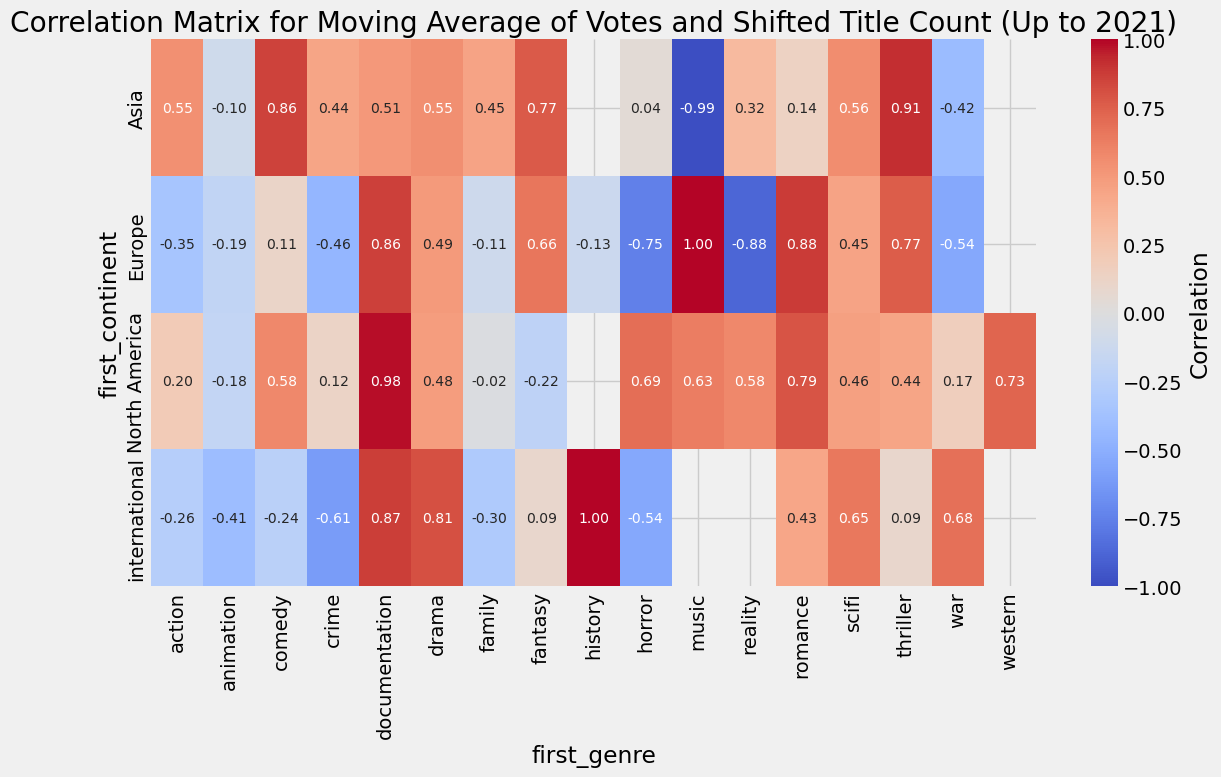

In [92]:
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.heatmap(pivot_table.loc[['Asia', 'Europe', 'North America', 'international']], annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10}, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix for Moving Average of Votes and Shifted Title Count (Up to 2021)')
plt.tight_layout()  # Adjust layout to fit all elements
plt.savefig('plot1.png', format='png')
plt.show()

In [93]:
titles_df = titles_df[titles_df['release_year'] < 2021]
summary = titles_df.groupby(['first_continent', 'first_genre', 'release_year']).agg({
    'imdb_votes': 'sum',
    'title': 'count'
}).reset_index().rename(columns={'title': 'title_count'})

# Step 2: Calculate Moving Average of Votes
summary['imdb_votes_ma'] = summary.groupby(['first_continent', 'first_genre'])['imdb_votes'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Step 3: Shift the Count Data
summary['title_count_shifted'] = summary.groupby(['first_continent', 'first_genre'])['title_count'].shift(-1)

# Step 4: Calculate Correlation for Each Continent and Genre
correlations = summary.dropna().groupby(['first_continent', 'first_genre']).apply(
    lambda x: x[['imdb_votes_ma', 'title_count_shifted']].corr().iloc[0, 1]
).reset_index().rename(columns={0: 'correlation'})

# Display the results for all continents
correlations_all = correlations
pd.set_option('display.max_rows', None)

correlations_all

,first_continent,first_genre,correlation
0,Africa,action,NaN
1,Africa,comedy,0.423416
2,Africa,crime,-0.598879
3,Africa,documentation,-0.936301
4,Africa,drama,-0.134069
5,Africa,horror,NaN
6,Africa,romance,-0.013906
7,Africa,thriller,-0.110865
8,Asia,action,0.545299
9,Asia,animation,-0.104247


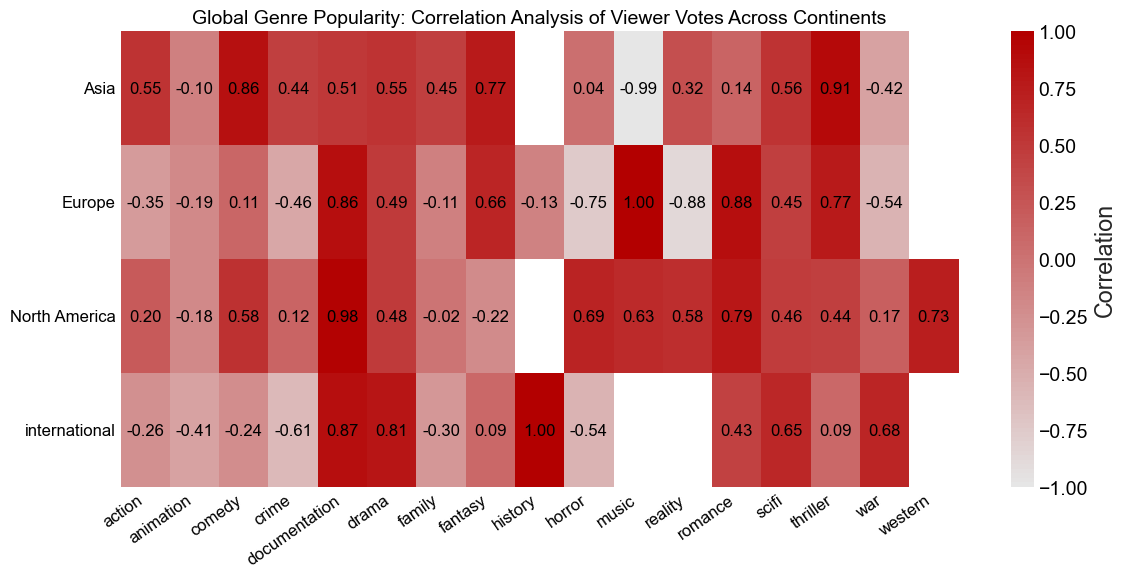

In [94]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(12, 6))

colors = [(0.9, 0.9, 0.9), (0.7, 0, 0)] 
n_bins = 100  
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


sns.set_style("white")
ax = sns.heatmap(
    pivot_table.loc[['Asia', 'Europe', 'North America', 'international']], 
    annot=True, 
    cmap=cm, 
    vmin=-1, 
    vmax=1, 
    fmt=".2f", 
    annot_kws={"size": 12, "color": "black"}, 
    cbar_kws={"label": "Correlation"}
)


plt.title('Global Genre Popularity: Correlation Analysis of Viewer Votes Across Continents', fontsize=14, color='black')
plt.xticks(rotation=35, ha='right', fontsize=12, color='black')
plt.yticks(rotation=0, fontsize=12, color='black')
plt.xlabel('')
plt.ylabel('')


ax.set_facecolor('white')
plt.gcf().set_facecolor('white')


colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_tick_params(color='black')
colorbar.outline.set_edgecolor('black')
plt.setp(plt.getp(colorbar.ax.axes, 'yticklabels'), color='black')


ax.grid(False)

plt.tight_layout() 
plt.savefig('plot1.png', format='png')
plt.show()